In [ ]:
from google.colab import drive

# Lệnh này sẽ mount Google Drive vào thư mục /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [ ]:
# --- BƯỚC 1: upload data ---
print("Đang tải dữ liệu...")
# 'low_memory=False' giúp tránh cảnh báo khi pandas đoán sai kiểu dữ liệu hỗn hợp
train = pd.read_csv('/content/drive/MyDrive/data_ml/train.csv', parse_dates=['Date'], engine='python', on_bad_lines='warn')
store = pd.read_csv('/content/drive/MyDrive/data_ml/store.csv')

print(f"Kích thước tập Train: {train.shape}")
print(f"Kích thước tập Store: {store.shape}")

print(f"Check duplicated values: {train.duplicated().sum()}")
print(f"Check duplicated values: {store.duplicated().sum()}")

Đang tải dữ liệu...
Kích thước tập Train: (1017209, 9)
Kích thước tập Store: (1115, 10)
Check duplicated values: 0
Check duplicated values: 0


In [ ]:
# Merge data
df_merge = pd.merge(train, store, on='Store', how='left')
print("\n--- Dữ liệu THÔ sau khi merge ---")
print(f"Tổng số dòng: {df_merge.shape[0]}")
print(f"Tổng số cột: {df_merge.shape[1]}")
display(df_merge.head())


--- Dữ liệu THÔ sau khi merge ---
Tổng số dòng: 1017209
Tổng số cột: 18


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Data Dictionary (Từ điển dữ liệu)

| Tên Cột | Nguồn | Ý Nghĩa & Giải Thích Chi Tiết |
| :--- | :---: | :--- |
| **Store** | Cả 2 | ID định danh duy nhất của mỗi cửa hàng (Key để merge). |
| **DayOfWeek** | Train | Ngày trong tuần (1 = Thứ 2, ..., 7 = Chủ Nhật). |
| **Date** | Train | Ngày phát sinh giao dịch. |
| **Sales** | Train | **Biến mục tiêu (Target Variable):** Doanh thu trong ngày. |
| **Customers** | Train | Số lượng khách hàng đến mua sắm trong ngày. |
| **Open** | Train | Trạng thái cửa hàng: `0` = Đóng cửa, `1` = Mở cửa. |
| **Promo** | Train | **Khuyến mãi ngắn hạn:** `1` = Cửa hàng đang chạy promo ngày hôm đó, `0` = Không. |
| **StateHoliday** | Train | Ngày nghỉ lễ quốc gia: `a` = Public holiday, `b` = Easter, `c` = Christmas, `0` = Ngày thường. |
| **SchoolHoliday** | Train | Ngày nghỉ học: `1` = Trường công lập đóng cửa vào ngày đó, `0` = Không. |
| **StoreType** | Store | Mô hình cửa hàng: Có 4 loại `a`, `b`, `c`, `d` (Ví dụ: cửa hàng nhỏ, siêu thị lớn...). |
| **Assortment** | Store | Mức độ đa dạng hàng hóa: `a` = Basic (Cơ bản), `b` = Extra (Thêm), `c` = Extended (Mở rộng). |
| **CompetitionDistance** | Store | Khoảng cách (mét) đến đối thủ cạnh tranh gần nhất. |
| **CompetitionOpenSince[Month/Year]** | Store | Thời điểm (Tháng/Năm) đối thủ cạnh tranh gần nhất bắt đầu mở cửa. |
| **Promo2** | Store | **Khuyến mãi dài hạn/tiếp diễn:** `0` = Không tham gia, `1` = Có tham gia. |
| **Promo2Since[Week/Year]** | Store | Tuần và Năm bắt đầu tham gia chương trình Promo2. |
| **PromoInterval** | Store | Các tháng mà Promo2 được khởi động lại (Ví dụ: "Jan,Apr,Jul,Oct"). |

In [ ]:
print("Số lượng giá trị bị thiếu trên mỗi cột:")
print(df_merge.isnull().sum().sort_values(ascending=False))

Số lượng giá trị bị thiếu trên mỗi cột:
Promo2SinceWeek              508031
PromoInterval                508031
Promo2SinceYear              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
DayOfWeek                         0
Store                             0
Date                              0
Sales                             0
StoreType                         0
SchoolHoliday                     0
StateHoliday                      0
Promo                             0
Open                              0
Customers                         0
Assortment                        0
Promo2                            0
dtype: int64


In [ ]:
print(f"Dữ liệu từ ngày: {df_merge['Date'].min()} đến ngày: {df_merge['Date'].max()}")
print(f"Tổng số ngày: {(df_merge['Date'].max() - df_merge['Date'].min()).days}")

Dữ liệu từ ngày: 2013-01-01 00:00:00 đến ngày: 2015-07-31 00:00:00
Tổng số ngày: 941


In [ ]:
print("Số lượng giá trị duy nhất của các cột phân loại:")
cols_to_check = ['StoreType', 'Assortment', 'StateHoliday', 'SchoolHoliday']
for col in cols_to_check:
    print(f"{col}: {df_merge[col].unique()}")

Số lượng giá trị duy nhất của các cột phân loại:
StoreType: ['c' 'a' 'd' 'b']
Assortment: ['a' 'c' 'b']
StateHoliday: ['0' 'a' 'b' 'c']
SchoolHoliday: [1 0]


In [ ]:
# Lọc dữ liệu: Chỉ lấy những ngày cửa hàng MỞ CỬA (Open == 1) và có Doanh thu > 0
# Lý do: Nếu tính cả ngày đóng cửa (Sales=0), trung bình của "Không Promo" sẽ bị kéo xuống thấp sai lệch.
df_open = df_merge[(df_merge['Open'] == 1) & (df_merge['Sales'] > 0)].copy()
print("\n--- CHỈ LẤY NHỮNG NGÀY MỞ CỬA VÀ CÓ DOANH THU > O ---")
print(f"Tổng số dòng: {df_open.shape[0]}")
print(f"Tổng số cột: {df_open.shape[1]}")
display(df_open.head())


--- CHỈ LẤY NHỮNG NGÀY MỞ CỬA VÀ CÓ DOANH THU > O ---
Tổng số dòng: 844338
Tổng số cột: 18


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# PROMO - VŨ KHÍ CHIẾN ĐẤU VÔ CÙNG MẠNH MẼ!

### 1. SỨC MẠNH CỦA PROMO

--- KẾT QUẢ PHÂN TÍCH TÁC ĐỘNG CỦA PROMO ---
Doanh thu trung bình (Không Promo): 5,930
Doanh thu trung bình (Có Promo):    8,229
Sales Uplift (Mức tăng trưởng):     38.77%
--------------------------------------------------


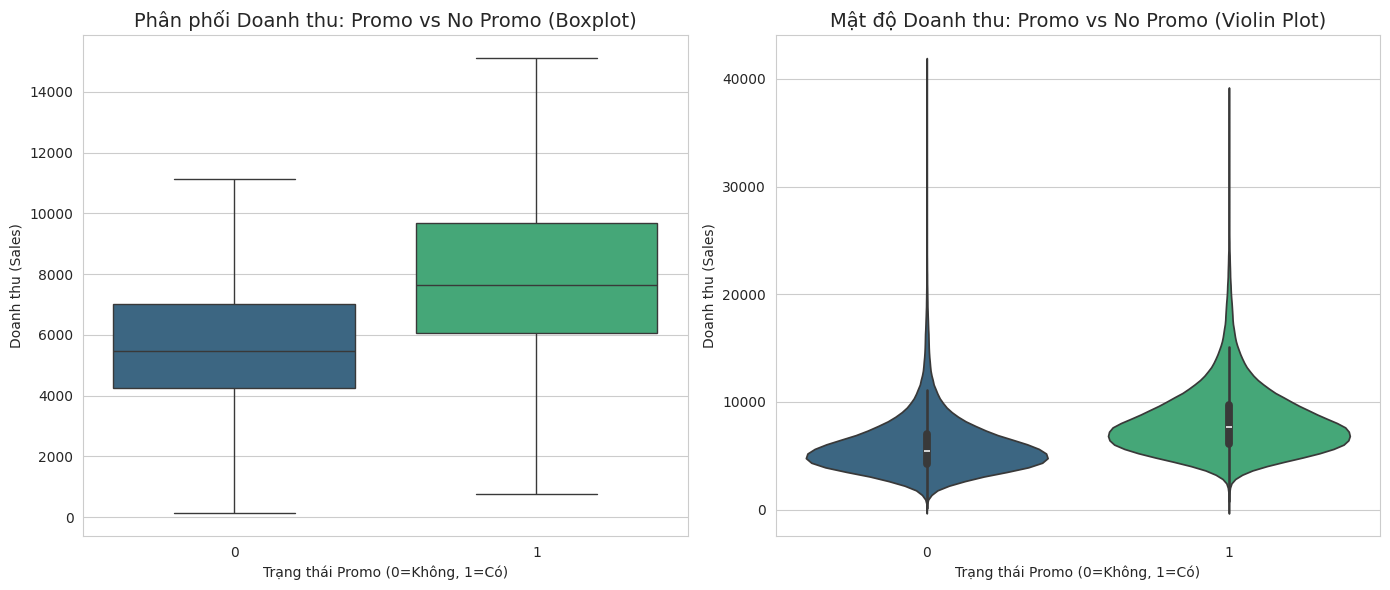

In [ ]:

# --- 2. Tính toán Sales Uplift (Lift Analysis) ---
# Tính trung bình Sales theo nhóm Promo
promo_stats = df_open.groupby('Promo')['Sales'].mean()
sales_no_promo = promo_stats[0]
sales_promo = promo_stats[1]

# Tính % tăng trưởng (Uplift)
uplift = ((sales_promo - sales_no_promo) / sales_no_promo) * 100

print(f"--- KẾT QUẢ PHÂN TÍCH TÁC ĐỘNG CỦA PROMO ---")
print(f"Doanh thu trung bình (Không Promo): {sales_no_promo:,.0f}")
print(f"Doanh thu trung bình (Có Promo):    {sales_promo:,.0f}")
print(f"Sales Uplift (Mức tăng trưởng):     {uplift:.2f}%")
print("-" * 50)

# --- 3. Trực quan hóa (Boxplot & Violin Plot) ---
plt.figure(figsize=(14, 6))

# Biểu đồ 1: Boxplot - Hiển thị phân phối và các giá trị ngoại lai (Outliers)
plt.subplot(1, 2, 1)
sns.boxplot(x='Promo', y='Sales', data=df_open, palette='viridis', showfliers=False) # showfliers=False để ẩn bớt các điểm ngoại lai quá xa giúp nhìn chart gọn hơn
plt.title('Phân phối Doanh thu: Promo vs No Promo (Boxplot)', fontsize=14)
plt.xlabel('Trạng thái Promo (0=Không, 1=Có)')
plt.ylabel('Doanh thu (Sales)')

# Biểu đồ 2: Violin Plot - Hiển thị mật độ dữ liệu (độ phình của biểu đồ)
plt.subplot(1, 2, 2)
sns.violinplot(x='Promo', y='Sales', data=df_open, palette='viridis')
plt.title('Mật độ Doanh thu: Promo vs No Promo (Violin Plot)', fontsize=14)
plt.xlabel('Trạng thái Promo (0=Không, 1=Có)')
plt.ylabel('Doanh thu (Sales)')

plt.tight_layout()
plt.show()

=== Hiệu quả của Promo ===
Tăng trưởng Lượng khách (Traffic): 21.18%
Tăng trưởng Giá trị giỏ hàng (Basket Size): 13.84%


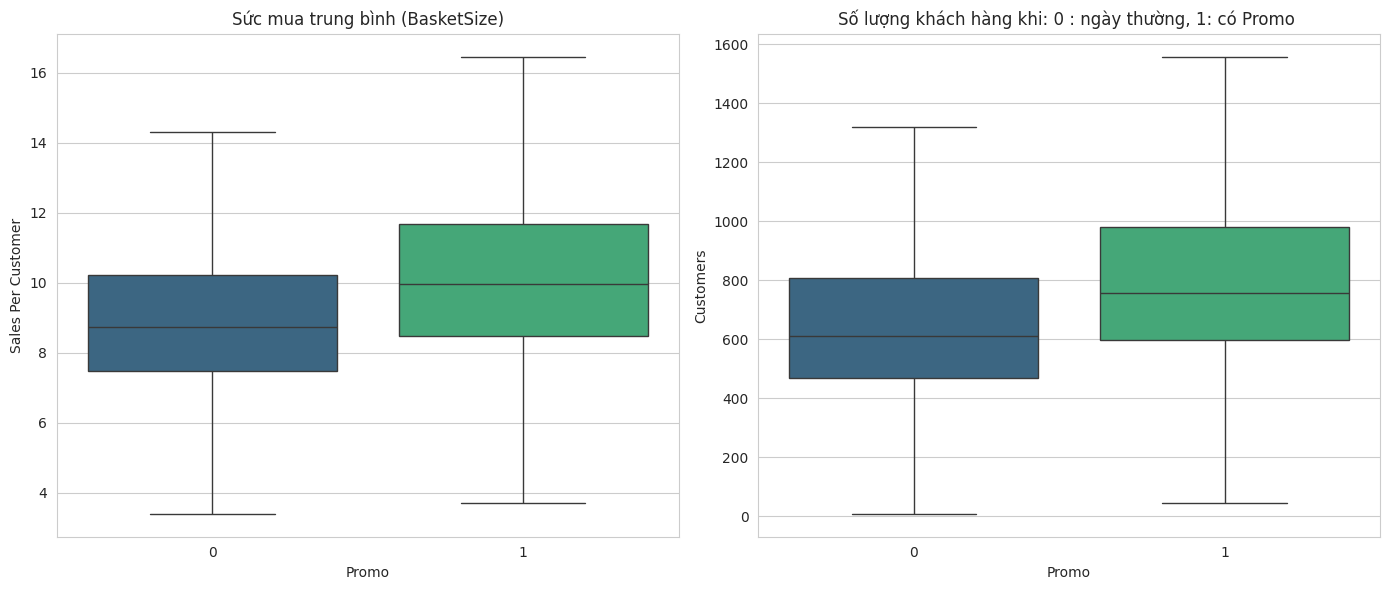

In [ ]:
# 2. Tính toán chỉ số SalesPerCustomer (Basket Size)
df_open['BasketSize'] = df_open['Sales'] / df_open['Customers']

# 3. Tính toán các chỉ số trung bình theo Promo
promo_stats = df_open.groupby('Promo')[['Sales', 'Customers', 'BasketSize']].mean().reset_index()

# Tính % tăng trưởng
traffic_growth = (promo_stats.loc[1, 'Customers'] - promo_stats.loc[0, 'Customers']) / promo_stats.loc[0, 'Customers'] * 100
basket_growth = (promo_stats.loc[1, 'BasketSize'] - promo_stats.loc[0, 'BasketSize']) / promo_stats.loc[0, 'BasketSize'] * 100

print(f"=== Hiệu quả của Promo ===")
print(f"Tăng trưởng Lượng khách (Traffic): {traffic_growth:.2f}%")
print(f"Tăng trưởng Giá trị giỏ hàng (Basket Size): {basket_growth:.2f}%")
# Tạo khung hình (Figure) với 1 hàng và 2 cột
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# --- BIỂU ĐỒ 2: Boxplot Sức mua (BasketSize) ---
sns.boxplot(data=df_open, x='Promo', y='BasketSize', palette='viridis',
            ax=axes[0], showfliers=False)
axes[0].set_title('Sức mua trung bình (BasketSize)')
axes[0].set_ylabel('Sales Per Customer')

# --- BIỂU ĐỒ 3: Boxplot Lượng khách (Customers) ---
sns.boxplot(data=df_open, x='Promo', y='Customers', palette='viridis',
            ax=axes[1], showfliers=False)
axes[1].set_title('Số lượng khách hàng khi: 0 : ngày thường, 1: có Promo ')
axes[1].set_ylabel('Customers')

# Căn chỉnh lại khoảng cách giữa các biểu đồ cho đẹp
plt.tight_layout()
plt.show()

Có thể thấy chương trình khuyến mãi (Promo) như một liều "doping" cho doanh số. Kết quả tổng quan cho thấy liều thuốc này cực kỳ hiệu quả:

- **Doanh thu bùng nổ:** Promo giúp doanh thu trung bình tăng từ 5900 lên 8200, tương đương mức tăng trưởng 38.77%.

- **Cơ chế tác động:** Promo không chỉ lôi kéo thêm khách hàng mới (Traffic tăng 21%) mà còn khiến họ chịu chi nhiều hơn cho mỗi lần mua (Giá trị giỏ hàng tăng 13.8%).


### 2.VŨ KHÍ ẤY PHẢI BIẾT CÁCH SỬ DỤNG MỚI CÓ THỂ TẬN DỤNG HẾT SỨC MẠNH CỦA NÓ!

### 2.1.ĐẦU TIÊN CHÚNG TA CẦN BIẾT SỬ DỤNG PROMO Ở ĐÂU?

In [ ]:


# 2. Lọc dữ liệu: Chỉ lấy những ngày Cửa hàng MỞ CỬA (Open = 1)
df_open = df_merge[df_merge['Open'] == 1]

# 3. Phân tích riêng Store Type 'b'
print("--- TẦN SUẤT MỞ CỬA CỦA STORE TYPE 'B' THEO THỨ ---")
# DayOfWeek: 1=Thứ Hai, ..., 7=Chủ Nhật
store_b_days = df_open[df_open['StoreType'] == 'b']['DayOfWeek'].value_counts().sort_index()
print(store_b_days)

# 4. So sánh nhanh với các loại cửa hàng khác để thấy sự khác biệt
print("\n--- SO SÁNH SỐ NGÀY MỞ CỬA CỦA CÁC LOẠI STORE (Đặc biệt là Day 7 - Chủ Nhật) ---")
# Tạo bảng chéo: Hàng là StoreType, Cột là DayOfWeek, Giá trị là số ngày mở
comparison = pd.crosstab(df_open['StoreType'], df_open['DayOfWeek'])
print(comparison)

--- TẦN SUẤT MỞ CỬA CỦA STORE TYPE 'B' THEO THỨ ---
DayOfWeek
1    2215
2    2228
3    2228
4    2230
5    2231
6    2215
7    2216
Name: count, dtype: int64

--- SO SÁNH SỐ NGÀY MỞ CỬA CỦA CÁC LOẠI STORE (Đặc biệt là Day 7 - Chủ Nhật) ---
DayOfWeek      1      2      3      4      5      6     7
StoreType                                                
a          74603  78111  76993  73026  75130  78114  1100
b           2215   2228   2228   2230   2231   2215  2216
c          18458  19343  19053  18143  18613  19368     0
d          42284  44279  43662  41245  42666  44361   277


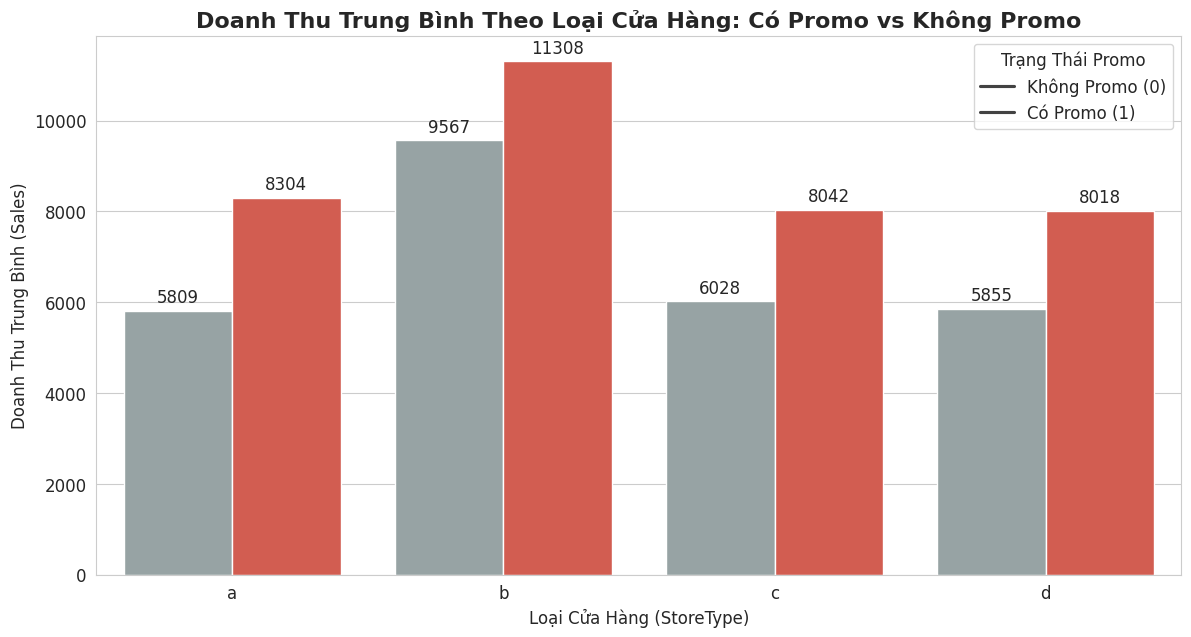


--- BÁO CÁO HIỆU QUẢ PROMO THEO LOẠI CỬA HÀNG ---


,No_Promo_Sales,Promo_Sales,Uplift_Percent
StoreType,,,
a,"5,809","8,304",42.96%
b,"9,567","11,308",18.20%
c,"6,028","8,042",33.41%
d,"5,855","8,018",36.93%


In [ ]:
# --- BƯỚC: PHÂN TÍCH HIỆU QUẢ PROMO THEO TỪNG LOẠI CỬA HÀNG (STORETYPE) ---

# 1. Tính toán doanh thu trung bình theo StoreType và Promo
# Gom nhóm theo loại cửa hàng và trạng thái khuyến mãi
store_promo_stats = df_open.groupby(['StoreType', 'Promo'])['Sales'].mean().reset_index()

# 2. Trực quan hóa bằng biểu đồ cột (Bar Chart)
plt.figure(figsize=(14, 7))

# Vẽ biểu đồ
chart = sns.barplot(
    x='StoreType',
    y='Sales',
    hue='Promo',
    data=store_promo_stats,
    palette={0: '#95a5a6', 1: '#e74c3c'} # Màu xám cho ko promo, Đỏ cho có promo
)

# Trang trí biểu đồ
plt.title('Doanh Thu Trung Bình Theo Loại Cửa Hàng: Có Promo vs Không Promo', fontsize=16, fontweight='bold')
plt.xlabel('Loại Cửa Hàng (StoreType)', fontsize=12)
plt.ylabel('Doanh Thu Trung Bình (Sales)', fontsize=12)
plt.legend(title='Trạng Thái Promo', labels=['Không Promo (0)', 'Có Promo (1)'])

# Hiển thị giá trị trên cột
for container in chart.containers:
    chart.bar_label(container, fmt='%.0f', padding=3)

plt.show()

# 3. Tính toán % Tăng trưởng (Uplift) chi tiết
# Pivot bảng để dễ so sánh cột 0 (Ko Promo) và 1 (Có Promo)
pivot_report = store_promo_stats.pivot(index='StoreType', columns='Promo', values='Sales')

# Đổi tên cột cho rõ nghĩa
pivot_report.columns = ['No_Promo_Sales', 'Promo_Sales']

# Tính % Tăng trưởng
pivot_report['Uplift_Percent'] = ((pivot_report['Promo_Sales'] - pivot_report['No_Promo_Sales']) / pivot_report['No_Promo_Sales']) * 100

# Làm đẹp bảng báo cáo
print("\n--- BÁO CÁO HIỆU QUẢ PROMO THEO LOẠI CỬA HÀNG ---")
# Format số liệu
formatted_report = pivot_report.style.format({
    'No_Promo_Sales': '{:,.0f}',
    'Promo_Sales': '{:,.0f}',
    'Uplift_Percent': '{:,.2f}%'
}).background_gradient(cmap='Greens', subset=['Uplift_Percent']) # Tô màu xanh cho cột tăng trưởng

display(formatted_report)

--- BẢNG HIỆU QUẢ LỢI NHUẬN (CHỈ TÍNH THỨ 2 - THỨ 6) ---


,Avg_Profit_NoPromo,Avg_Profit_Promo,Profit_Uplift_%
StoreType,,,
a,"2,411.4","2,491.2",3.3
b,"3,770.7","3,392.4",-10.0
c,"2,306.4","2,412.6",4.6
d,"2,255.1","2,405.3",6.7


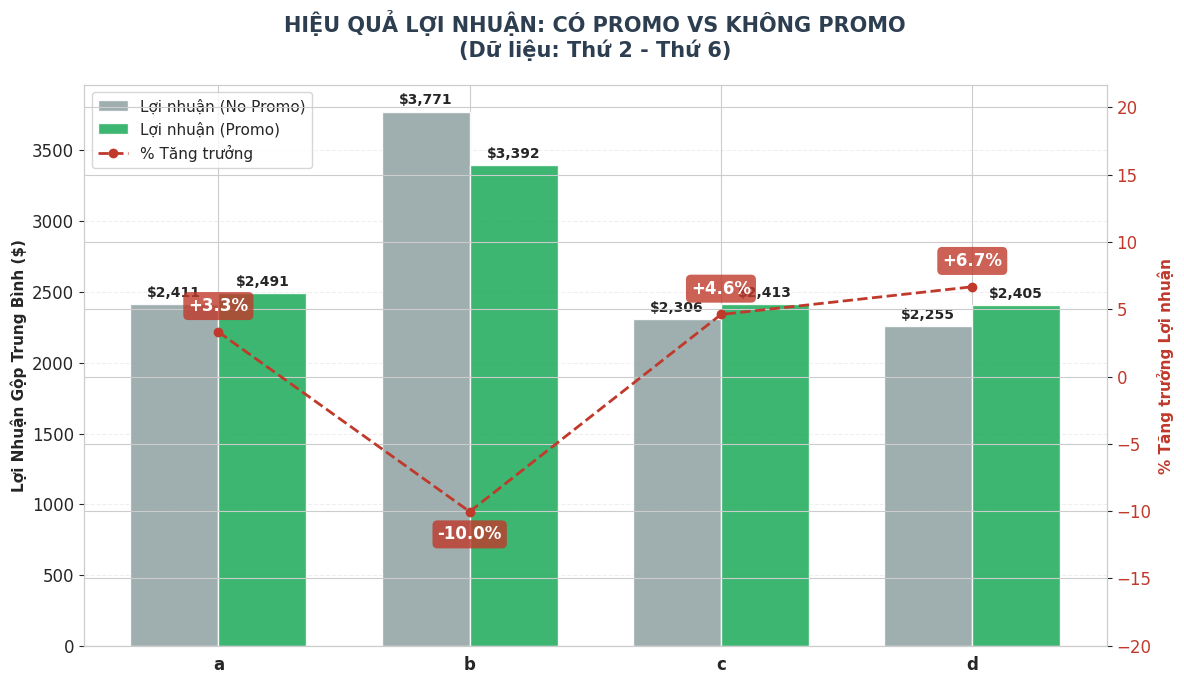

In [ ]:

# 1. THIẾT LẬP GIẢ ĐỊNH & LỌC DỮ LIỆU
MARGIN_NO_PROMO = 0.40  # 40% Lợi nhuận
MARGIN_WITH_PROMO = 0.30  # 30% Lợi nhuận (đã trừ chi phí KM)

# --- QUAN TRỌNG: CHỈ LẤY DỮ LIỆU TỪ THỨ 2 ĐẾN THỨ 6 ---
# Giả định: DayOfWeek 1=Mon, ..., 5=Fri, 6=Sat, 7=Sun
# Loại bỏ hoàn toàn T7 và CN ra khỏi tính toán
df_weekdays = df_open[df_open['DayOfWeek'] <= 5].copy()

# 2. TÍNH TOÁN GROSS PROFIT TRÊN DỮ LIỆU ĐÃ LỌC
df_weekdays['GrossProfit'] = np.where(
    df_weekdays['Promo'] == 1,
    df_weekdays['Sales'] * MARGIN_WITH_PROMO,
    df_weekdays['Sales'] * MARGIN_NO_PROMO
)

# 3. TỔNG HỢP DỮ LIỆU (GROUPBY & PIVOT)
# Tính trung bình theo StoreType và Promo
stats = df_weekdays.groupby(['StoreType', 'Promo'])['GrossProfit'].mean().reset_index()

# Pivot bảng
table = stats.pivot(index='StoreType', columns='Promo', values='GrossProfit')
table.columns = ['Avg_Profit_NoPromo', 'Avg_Profit_Promo']

# Tính % Tăng trưởng (Uplift)
table['Profit_Uplift_%'] = ((table['Avg_Profit_Promo'] - table['Avg_Profit_NoPromo']) / table['Avg_Profit_NoPromo']) * 100

# Hiển thị bảng số liệu trước khi vẽ
print("--- BẢNG HIỆU QUẢ LỢI NHUẬN (CHỈ TÍNH THỨ 2 - THỨ 6) ---")
display(table.style.background_gradient(cmap='RdYlGn', subset=['Profit_Uplift_%']).format("{:,.1f}"))

# 4. VẼ BIỂU ĐỒ (VISUALIZATION)
# ---------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(12, 7))

x = np.arange(len(table.index))
width = 0.35

# Màu sắc
col_no = '#95a5a6'   # Xám (Không KM)
col_yes = '#27ae60'  # Xanh lá (Có KM)
col_line = '#c0392b' # Đỏ (Đường % tăng trưởng)

# --- VẼ CỘT (DOANH THU/LỢI NHUẬN) ---
rects1 = ax1.bar(x - width/2, table['Avg_Profit_NoPromo'], width, label='Lợi nhuận (No Promo)', color=col_no, alpha=0.9)
rects2 = ax1.bar(x + width/2, table['Avg_Profit_Promo'], width, label='Lợi nhuận (Promo)', color=col_yes, alpha=0.9)

# Thiết lập trục chính (Ax1)
ax1.set_title('HIỆU QUẢ LỢI NHUẬN: CÓ PROMO VS KHÔNG PROMO\n(Dữ liệu: Thứ 2 - Thứ 6)',
              fontsize=15, fontweight='bold', pad=20, color='#2c3e50')
ax1.set_xticks(x)
ax1.set_xticklabels(table.index, fontsize=12, fontweight='bold')
ax1.set_ylabel('Lợi Nhuận Gộp Trung Bình ($)', fontweight='bold', fontsize=11)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Thêm nhãn giá trị lên đầu cột
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax1.annotate(f'${h:,.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, h),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

autolabel(rects1)
autolabel(rects2)

# --- VẼ ĐƯỜNG % UPLIFT (TRỤC PHỤ) ---
ax2 = ax1.twinx()
ax2.plot(x, table['Profit_Uplift_%'], color=col_line, marker='o', lw=2, linestyle='--', label='% Tăng trưởng')

# Nhãn % Uplift
for i, val in enumerate(table['Profit_Uplift_%']):
    # Nếu giá trị âm thì đẩy nhãn xuống dưới điểm, dương thì đẩy lên trên
    offset = 15 if val >= 0 else -20
    ax2.annotate(f'{val:+.1f}%', (x[i], val),
                 xytext=(0, offset), textcoords='offset points',
                 ha='center', color='white', fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc=col_line, ec="none", alpha=0.8))

# Thiết lập trục phụ (Ax2)
# Mở rộng giới hạn trục y để nhãn không bị cắt
mn, mx = table['Profit_Uplift_%'].min(), table['Profit_Uplift_%'].max()
ax2.set_ylim(mn - 10, mx + 15)
ax2.set_ylabel('% Tăng trưởng Lợi nhuận', color=col_line, fontweight='bold', fontsize=11)
ax2.tick_params(axis='y', labelcolor=col_line)

# --- HOÀN THIỆN ---
# Tạo Legend gộp
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

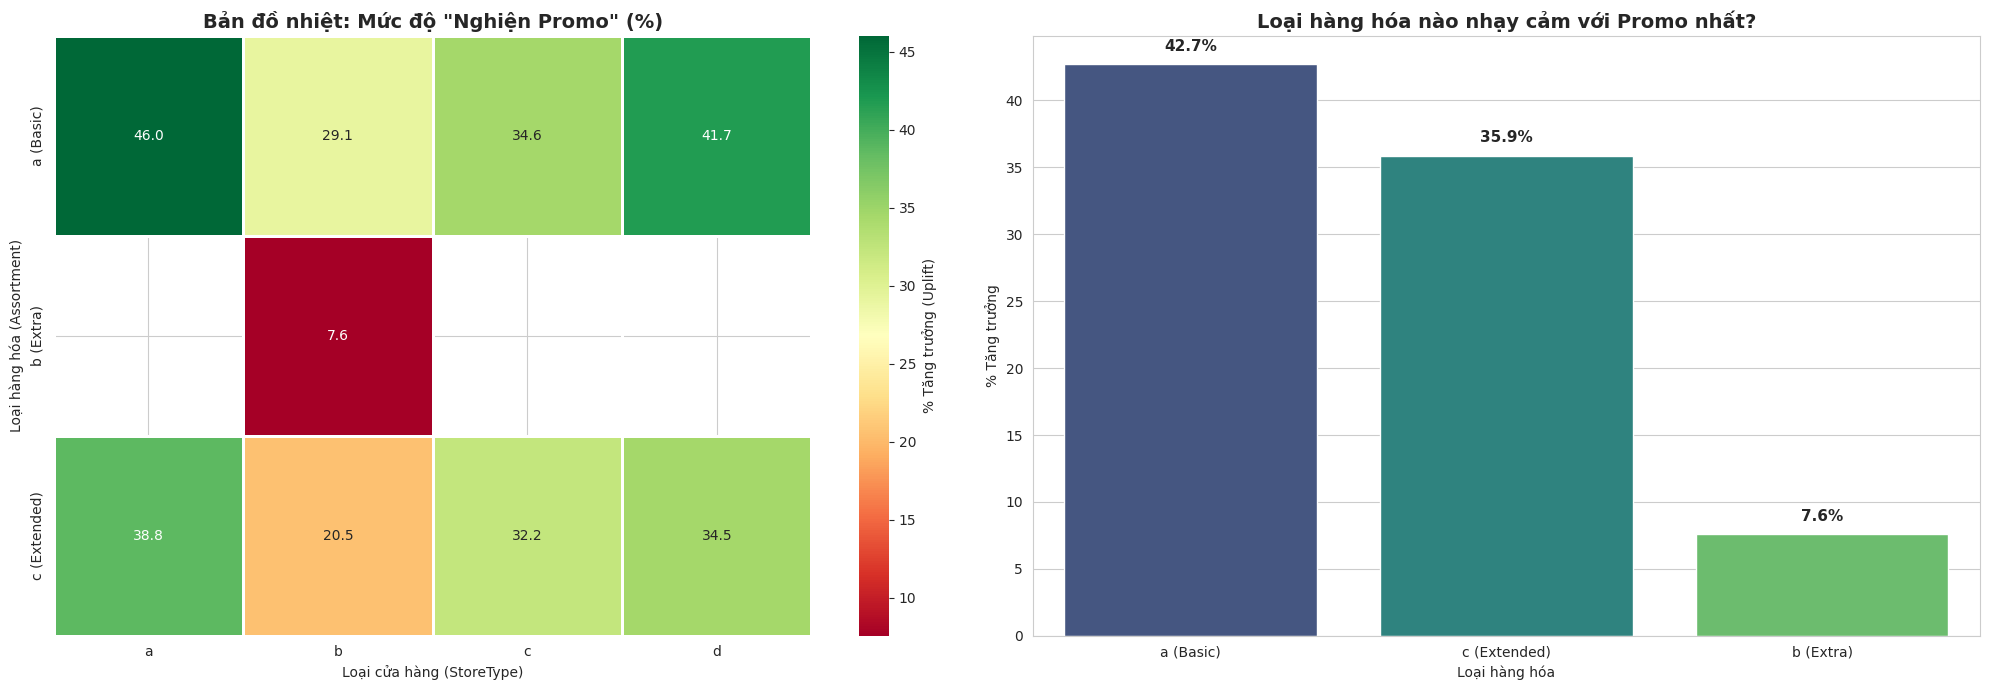

------------------------------
KẾT QUẢ PHÂN TÍCH ASSORTMENT:
1. Phân khúc 'VÀNG' (Tăng trưởng cao nhất):
   -> Cửa hàng loại 'a' bán hàng loại 'a (Basic)'
   -> Mức tăng trưởng: 46.0%

2. So sánh các loại hàng hóa:
   - a (Basic): Tăng 42.7%
   - c (Extended): Tăng 35.9%
   - b (Extra): Tăng 7.6%


In [ ]:
# --- 3. PHÂN TÍCH THEO LOẠI HÀNG HÓA (ASSORTMENT) ---

# Map tên đầy đủ cho dễ hiểu
assort_map = {'a': 'a (Basic)', 'b': 'b (Extra)', 'c': 'c (Extended)'}
df_analysis = df_open.copy()
df_analysis['Assortment_Full'] = df_analysis['Assortment'].map(assort_map)

# 3.1. Chuẩn bị dữ liệu: Group theo StoreType và Assortment
# Tính doanh thu trung bình
assort_stats = df_analysis.groupby(['StoreType', 'Assortment_Full', 'Promo'])['Sales'].mean().unstack()
assort_stats.columns = ['No_Promo', 'Promo']

# Tính % Tăng trưởng (Uplift)
assort_stats['Uplift_Pct'] = ((assort_stats['Promo'] - assort_stats['No_Promo']) / assort_stats['No_Promo']) * 100

# 3.2. Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# --- PLOT 1: Heatmap (StoreType vs Assortment) ---
# Chuyển đổi dữ liệu sang dạng ma trận cho Heatmap
# Index = Assortment, Columns = StoreType, Values = Uplift %
heatmap_data = assort_stats['Uplift_Pct'].unstack(level=0)

# Vẽ Heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".1f",
            cmap='RdYlGn',  # Màu Đỏ (Thấp) -> Xanh (Cao)
            linewidths=1, linecolor='white',
            cbar_kws={'label': '% Tăng trưởng (Uplift)'},
            ax=axes[0])

axes[0].set_title('Bản đồ nhiệt: Mức độ "Nghiện Promo" (%)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loại hàng hóa (Assortment)')
axes[0].set_xlabel('Loại cửa hàng (StoreType)')

# --- PLOT 2: Tổng quan theo Assortment (Bar Chart) ---
# Tính trung bình Uplift chỉ theo Assortment để so sánh gộp
assort_only = df_analysis.groupby(['Assortment_Full', 'Promo'])['Sales'].mean().unstack()
assort_only.columns = ['No_Promo', 'Promo']
assort_only['Uplift_Pct'] = ((assort_only['Promo'] - assort_only['No_Promo']) / assort_only['No_Promo']) * 100
assort_only = assort_only.sort_values('Uplift_Pct', ascending=False)

sns.barplot(x=assort_only.index, y=assort_only['Uplift_Pct'], palette='viridis', ax=axes[1])
axes[1].set_title('Loại hàng hóa nào nhạy cảm với Promo nhất?', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Loại hàng hóa')
axes[1].set_ylabel('% Tăng trưởng')

# Thêm nhãn giá trị
for i, v in enumerate(assort_only['Uplift_Pct']):
    axes[1].text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# --- 3.3. IN RA NHẬN XÉT ---
print("-" * 30)
print("KẾT QUẢ PHÂN TÍCH ASSORTMENT:")
# Tìm phân khúc tăng trưởng mạnh nhất
best_segment = assort_stats['Uplift_Pct'].idxmax() # Trả về (StoreType, Assortment)
max_val = assort_stats['Uplift_Pct'].max()

print(f"1. Phân khúc 'VÀNG' (Tăng trưởng cao nhất):")
print(f"   -> Cửa hàng loại '{best_segment[0]}' bán hàng loại '{best_segment[1]}'")
print(f"   -> Mức tăng trưởng: {max_val:.1f}%")

print(f"\n2. So sánh các loại hàng hóa:")
for assort in assort_only.index:
    print(f"   - {assort}: Tăng {assort_only.loc[assort, 'Uplift_Pct']:.1f}%")

- Mức độ tăng trưởng doanh thu của cả 4 cửa hàng là tốt!
- Tuy nhiên khi nhìn vào lợi nhuận các cửa hàng a,c,d tăng trường tốt NGOẠI TRỪ cửa hàng b. Bởi ta có thể thấy rằng cửa hàng b chủ yếu bán mặt hàng b( Extra) mà mặt hàng này lại ít nhạy cảm với PROMO nhất nên chi phí khuyến mãi "ăn mòn" lợi nhuận
 - - Ví dụ: Bình thường bán 10 cái, lãi 10 đồng. Có promo giảm giá, bán được 11 cái, nhưng lãi mỗi cái chỉ còn 8 đồng. Tổng lãi mới = 88 đồng < 100 đồng cũ. -> Lỗ.

 => **Cắt giảm Promo đại trà tại cửa hàng b: Vì không hiệu quả về lợi nhuận. Tập trung nguồn vốn vào đầu tư PROMO cho cửa hàng a,c,d**.

### 2.2 CHÚNG TA SỬ DỤNG PROMO VÀO LÚC NÀO?

### a) Ngày nào trong tuần, và tháng nào là tốt nhất?

In [ ]:
# Lấy tháng từ cột Date
df_open['Month'] = df_open['Date'].dt.month


BÁO CÁO PHÂN TÍCH: THỜI ĐIỂM ÁP DỤNG PROMO TỐT NHẤT

[A] HIỆU QUẢ THEO NGÀY TRONG TUẦN:
           No_Promo_Avg  Promo_Avg  Growth_Pct
DayOfWeek                                     
1               6222.73    9772.91       57.05
2               5716.41    8277.63       44.80
3               5617.73    7685.68       36.81
4               5750.88    7598.79       32.13
5               6344.41    7744.39       22.07
6               5875.08        NaN         NaN
7               8224.72        NaN         NaN

=> KẾT LUẬN NGÀY: Promo hiệu quả nhất vào Thứ 1 (Tăng trưởng 57.05%)

------------------------------
[B] TOP 3 THÁNG CÓ PROMO HIỆU QUẢ NHẤT:
       No_Promo_Avg  Promo_Avg  Growth_Pct
Month                                     
6           5872.00    8509.41       44.92
4           5855.31    8427.14       43.92
7           5753.07    8257.99       43.54

=> KẾT LUẬN THÁNG: Nên đẩy mạnh Promo vào các tháng: [6, 4, 7]


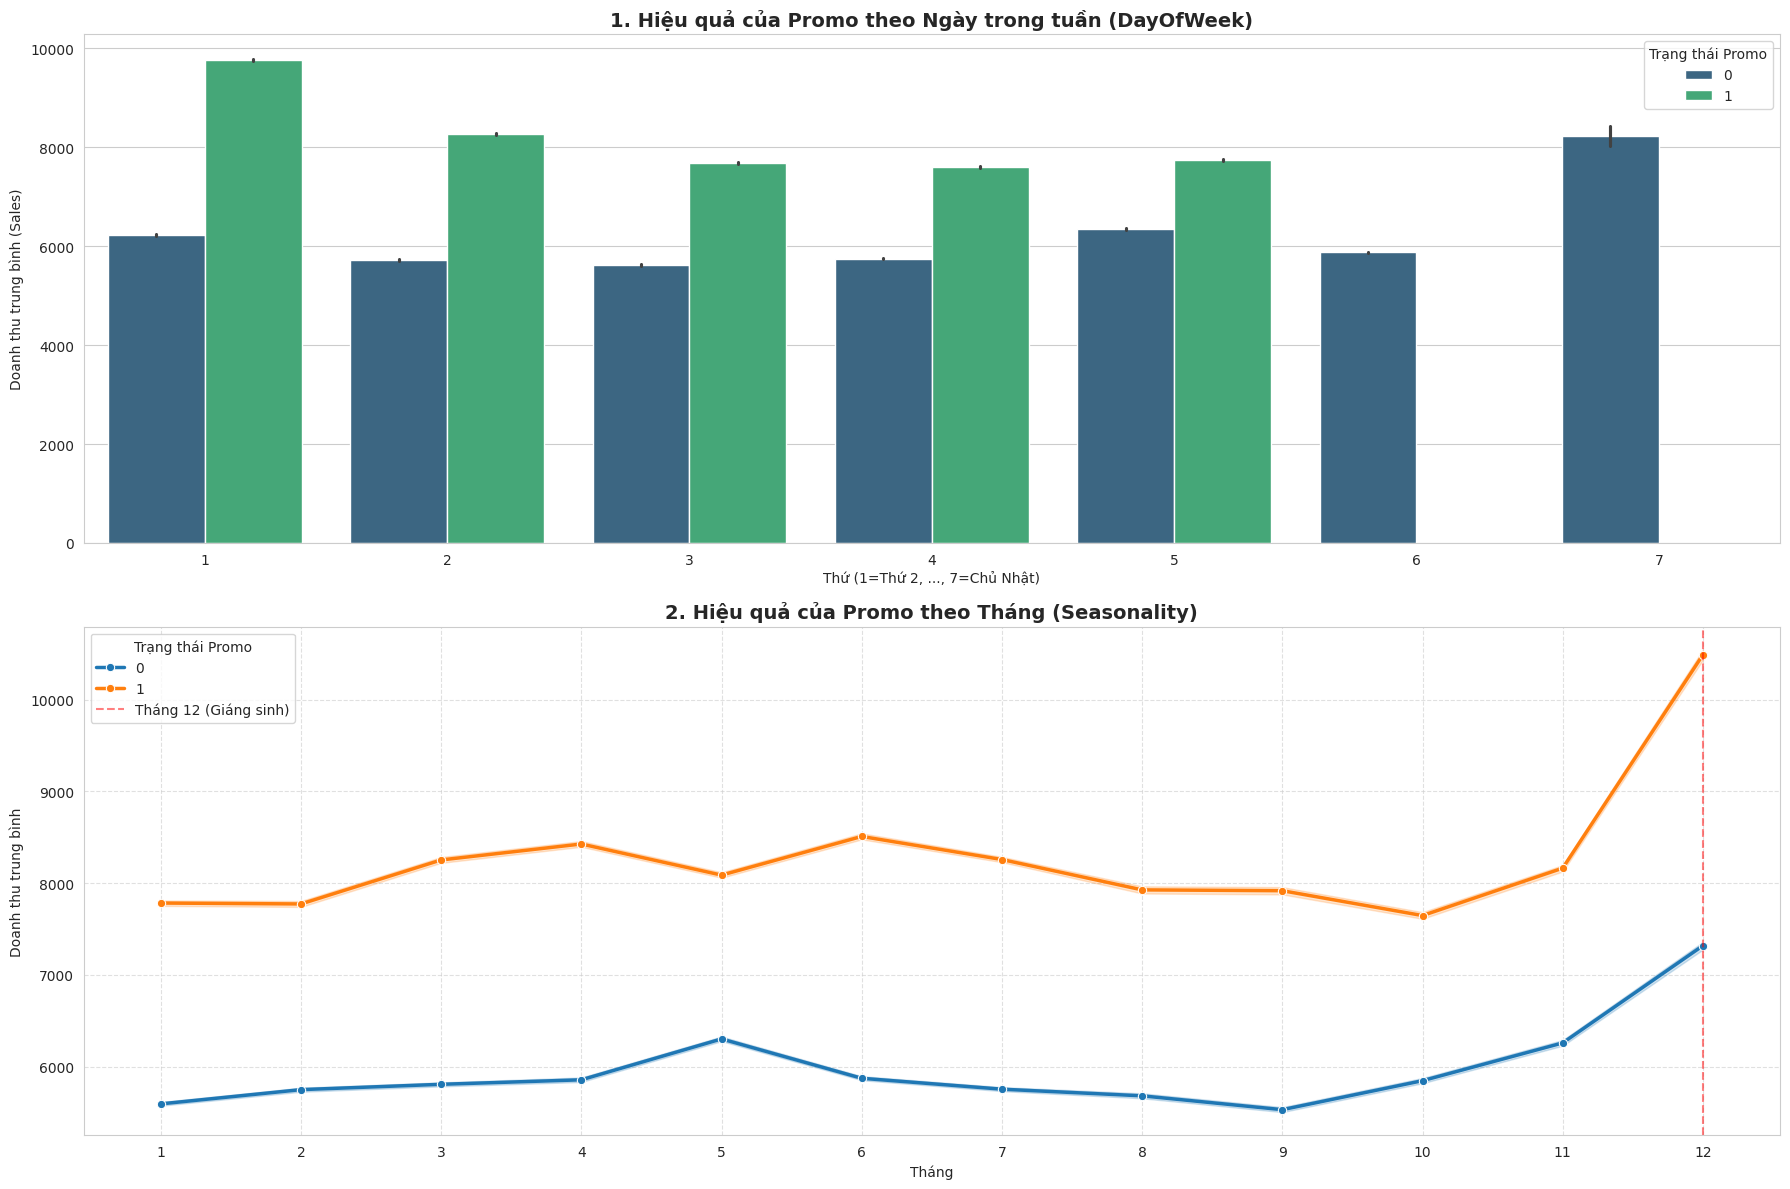

In [ ]:
import pandas as pd

df_open['Month'] = df_open['Date'].dt.month

# --- 3. PHÂN TÍCH HIỆU QUẢ PROMO (TEXT REPORT) ---
print("\n" + "="*50)
print("BÁO CÁO PHÂN TÍCH: THỜI ĐIỂM ÁP DỤNG PROMO TỐT NHẤT")
print("="*50)

# ---------------------------------------------------------
# PHẦN A: PHÂN TÍCH THEO NGÀY TRONG TUẦN (DayOfWeek)
# ---------------------------------------------------------
# Tính trung bình Sales theo từng ngày, tách riêng có Promo (1) và ko Promo (0)
day_summary = df_open.groupby(['DayOfWeek', 'Promo'])['Sales'].mean().unstack()

# Đổi tên cột cho dễ hiểu
day_summary.columns = ['No_Promo_Avg', 'Promo_Avg']

# Tính mức tăng trưởng tuyệt đối và phần trăm (%)
day_summary['Growth_Abs'] = day_summary['Promo_Avg'] - day_summary['No_Promo_Avg']
day_summary['Growth_Pct'] = (day_summary['Growth_Abs'] / day_summary['No_Promo_Avg']) * 100

# Sắp xếp theo mức tăng trưởng % giảm dần
top_days_growth = day_summary.sort_values(by='Growth_Pct', ascending=False)

print("\n[A] HIỆU QUẢ THEO NGÀY TRONG TUẦN:")
print(day_summary[['No_Promo_Avg', 'Promo_Avg', 'Growth_Pct']].round(2))

best_day = top_days_growth.index[0]
best_growth = top_days_growth.iloc[0]['Growth_Pct']
print(f"\n=> KẾT LUẬN NGÀY: Promo hiệu quả nhất vào Thứ {best_day} (Tăng trưởng {best_growth:.2f}%)")

# ---------------------------------------------------------
# PHẦN B: PHÂN TÍCH THEO THÁNG (Seasonality)
# ---------------------------------------------------------
month_summary = df_open.groupby(['Month', 'Promo'])['Sales'].mean().unstack()
month_summary.columns = ['No_Promo_Avg', 'Promo_Avg']

month_summary['Growth_Abs'] = month_summary['Promo_Avg'] - month_summary['No_Promo_Avg']
month_summary['Growth_Pct'] = (month_summary['Growth_Abs'] / month_summary['No_Promo_Avg']) * 100

# Tìm 3 tháng có mức tăng trưởng cao nhất
top_3_months = month_summary.sort_values(by='Growth_Pct', ascending=False).head(3)

print("\n" + "-"*30)
print("[B] TOP 3 THÁNG CÓ PROMO HIỆU QUẢ NHẤT:")
print(top_3_months[['No_Promo_Avg', 'Promo_Avg', 'Growth_Pct']].round(2))

print(f"\n=> KẾT LUẬN THÁNG: Nên đẩy mạnh Promo vào các tháng: {list(top_3_months.index)}")

print("="*50)# --- 2. VISUALIZATION (Vẽ biểu đồ) ---
plt.figure(figsize=(18, 12))

# --- BIỂU ĐỒ 1: Hiệu quả Promo theo Ngày trong tuần (DayOfWeek) ---
plt.subplot(2, 1, 1)
# Dùng Barplot để so sánh trực tiếp mức Sales trung bình
sns.barplot(x='DayOfWeek', y='Sales', hue='Promo', data=df_open, palette='viridis')

plt.title('1. Hiệu quả của Promo theo Ngày trong tuần (DayOfWeek)', fontsize=14, fontweight='bold')
plt.xlabel('Thứ (1=Thứ 2, ..., 7=Chủ Nhật)')
plt.ylabel('Doanh thu trung bình (Sales)')
plt.legend(title='Trạng thái Promo')

# --- BIỂU ĐỒ 2: Hiệu quả Promo theo Tháng (Seasonality) ---
plt.subplot(2, 1, 2)
# Dùng Lineplot để thấy xu hướng biến động và khoảng cách (gap) giữa 2 đường
sns.lineplot(x='Month', y='Sales', hue='Promo', data=df_open,
             marker='o', palette='tab10', linewidth=2.5)

# Đánh dấu các tháng đặc biệt (Ví dụ: Tháng 12)
plt.axvline(x=12, color='red', linestyle='--', alpha=0.5, label='Tháng 12 (Giáng sinh)')

plt.title('2. Hiệu quả của Promo theo Tháng (Seasonality)', fontsize=14, fontweight='bold')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu trung bình')
plt.xticks(range(1, 13)) # Hiển thị đủ từ tháng 1 đến 12
plt.legend(title='Trạng thái Promo')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


**- Ngày thứ Hai không hề "đen tối"**: Trái với suy nghĩ cuối tuần mới đông khách, dữ liệu cho thấy Thứ 2 (Monday) là ngày Promo phát huy hiệu quả khủng khiếp nhất: Tăng trưởng 57%. -> Giả thuyết: Khách hàng có tâm lý tích trữ đồ dùng cho cả tuần làm việc ngay từ ngày đầu tuần.

**- Mùa hè rực lửa:** Tháng 6, 4, 7 là những tháng đỉnh cao. Đây là lúc nhu cầu mua sắm tăng vọt, có thể liên quan đến các hoạt động mùa hè/nghỉ lễ giữa năm.

In [ ]:
#FEATURE ENGINEERING TRƯỚC LỄ VÀ SAU LỄ ( VÌ STATE HOLIDAY CỬA HÀNG ĐÓNG CỬA)
#1. Đảm bảo dữ liệu đã được sắp xếp để dùng hàm shift chính xác
df_merge = df_merge.sort_values(['Store', 'Date'])

# 2. Chuẩn hóa cột StateHoliday (chuyển hết về string để tránh lỗi 0 và '0')
df_merge['StateHoliday'] = df_merge['StateHoliday'].astype(str)

# 2. THỐNG KÊ TRẠNG THÁI CỬA HÀNG VÀO NGÀY LỄ
# Kiểm tra xem vào các ngày lễ (a, b, c), có bao nhiêu cửa hàng mở cửa và bán được hàng?
holiday_analysis = df_merge.groupby('StateHoliday').agg(
    Total_Records=('Store', 'count'),
    Closed_Stores=('Open', lambda x: (x == 0).sum()),
    Zero_Sales=('Sales', lambda x: (x == 0).sum()),
    Mean_Sales=('Sales', 'mean')
)

print("--- THỐNG KÊ TRẠNG THÁI CỬA HÀNG THEO NGÀY LỄ ---")
print(holiday_analysis)

# THỐNG KÊ TRẠNG THÁI CỬA HÀNG THEO SCHOOL HOLIDAY
# SchoolHoliday: 0 = Ngày thường (đi học), 1 = Ngày nghỉ học (lễ, hè, đông...)

school_holiday_status = df_merge.groupby('SchoolHoliday').agg(
    Total_Records=('Store', 'count'),
    Closed_Stores=('Open', lambda x: (x == 0).sum()),
    Zero_Sales=('Sales', lambda x: (x == 0).sum()),
    Mean_Sales=('Sales', 'mean')
)

# Define 'groups' here to resolve NameError
groups = df_merge.groupby('Store')['StateHoliday']

# Lấy thông tin ngày lễ của 1, 2, 3 ngày tiếp theo
df_merge['Holiday_Next_1_Day'] = groups.shift(-1)
df_merge['Holiday_Next_2_Day'] = groups.shift(-2)
df_merge['Holiday_Next_3_Day'] = groups.shift(-3)

# 4. Tạo biến xác định "Vừa Hết Lễ" (Look-back / Backward looking)
# Lấy thông tin ngày lễ của 1, 2, 3 ngày trước đó
df_merge['Holiday_Prev_1_Day'] = groups.shift(1)
df_merge['Holiday_Prev_2_Day'] = groups.shift(2)
df_merge['Holiday_Prev_3_Day'] = groups.shift(3)

# 5. Tạo cờ (Flag) để phân loại ngày
# List các mã ngày lễ quan trọng: a (Public), b (Easter), c (Christmas)
# Lưu ý: '0' là ngày thường
holidays = ['a', 'b', 'c']

# a. Cờ "Sắp nghỉ lễ" (Pre-Holiday): Nếu 1 trong 3 ngày tới là lễ
def check_pre_holiday(row):
    if (row['Holiday_Next_1_Day'] in holidays) or \
       (row['Holiday_Next_2_Day'] in holidays) or \
       (row['Holiday_Next_3_Day'] in holidays):
        return 1
    return 0

# b. Cờ "Sau nghỉ lễ" (Post-Holiday): Nếu 1 trong 3 ngày trước là lễ
def check_post_holiday(row):
    if (row['Holiday_Prev_1_Day'] in holidays) or \
       (row['Holiday_Prev_2_Day'] in holidays) or \
       (row['Holiday_Prev_3_Day'] in holidays):
        return 1
    return 0

df_merge['Is_Pre_Holiday'] = df_merge.apply(check_pre_holiday, axis=1)
df_merge['Is_Post_Holiday'] = df_merge.apply(check_post_holiday, axis=1)

# Lọc lại data: Chỉ lấy những ngày MỞ CỬA để phân tích sức mua
df_analysis = df_merge[(df_merge['Open'] == 1) & (df_merge['Sales'] > 0)].copy()

print("Đã tạo xong các biến: Is_Pre_Holiday (Sắp nghỉ) và Is_Post_Holiday (Vừa nghỉ xong)")

--- THỐNG KÊ TRẠNG THÁI CỬA HÀNG THEO NGÀY LỄ ---
              Total_Records  Closed_Stores  Zero_Sales   Mean_Sales
StateHoliday                                                       
0                    986159         142677      142731  5947.483893
a                     20260          19566       19566   290.735686
b                      6690           6545        6545   214.311510
c                      4100           4029        4029   168.733171
Đã tạo xong các biến: Is_Pre_Holiday (Sắp nghỉ) và Is_Post_Holiday (Vừa nghỉ xong)


### b) Linh hoạt áp dụng PROMO trước và sau lễ!


=== 2. HIỆU ỨNG TÍCH TRỮ TRƯỚC LỄ (PRE-HOLIDAY) ===
So sánh Doanh thu trung bình:
                   No_Promo        Promo     Uplift
Is_Pre_Holiday                                     
0               5849.693203  8153.071646  39.376056
1               6779.200446  9012.366228  32.941433


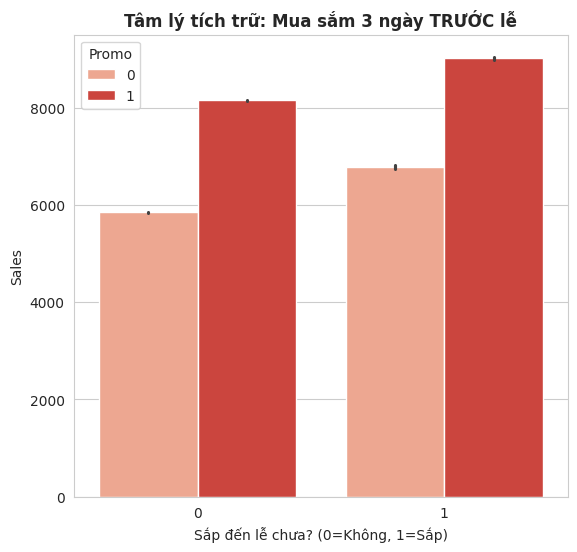

In [ ]:
# --- PHẦN 2: HIỆU ỨNG TÍCH TRỮ (PRE-HOLIDAY STOCKPILING) ---
print("\n=== 2. HIỆU ỨNG TÍCH TRỮ TRƯỚC LỄ (PRE-HOLIDAY) ===")
# So sánh: Ngày thường (ko dính dáng lễ) vs Ngày Sắp Lễ
# Loại bỏ những ngày vừa là Pre vừa là Post để clean dữ liệu
df_clean = df_analysis[~((df_analysis['Is_Pre_Holiday']==1) & (df_analysis['Is_Post_Holiday']==1))]

pre_stats = df_clean.groupby(['Is_Pre_Holiday', 'Promo'])['Sales'].mean().unstack()
pre_stats.columns = ['No_Promo', 'Promo']
pre_stats['Uplift'] = ((pre_stats['Promo'] - pre_stats['No_Promo']) / pre_stats['No_Promo']) * 100

print("So sánh Doanh thu trung bình:")
print(pre_stats)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Is_Pre_Holiday', y='Sales', hue='Promo', data=df_clean, palette='Reds')
plt.title('Tâm lý tích trữ: Mua sắm 3 ngày TRƯỚC lễ', fontsize=12, fontweight='bold')
plt.xlabel('Sắp đến lễ chưa? (0=Không, 1=Sắp)')
plt.ylabel('Sales')
plt.legend(title='Promo')


=== 3. TÂM LÝ MUA SẮM SAU LỄ (POST-HOLIDAY) ===
                    No_Promo        Promo     Uplift
Is_Post_Holiday                                     
0                5858.636694  8199.169876  39.950134
1                6363.730269  9103.286305  43.049531


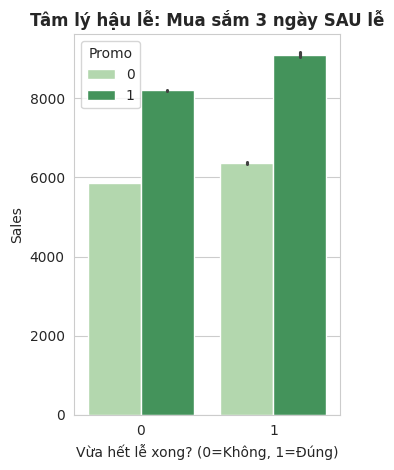

In [ ]:
# --- PHẦN 3: HIỆU ỨNG HẬU LỄ (POST-HOLIDAY HANGOVER) ---
print("\n=== 3. TÂM LÝ MUA SẮM SAU LỄ (POST-HOLIDAY) ===")
post_stats = df_clean.groupby(['Is_Post_Holiday', 'Promo'])['Sales'].mean().unstack()
post_stats.columns = ['No_Promo', 'Promo']
post_stats['Uplift'] = ((post_stats['Promo'] - post_stats['No_Promo']) / post_stats['No_Promo']) * 100
print(post_stats)

plt.subplot(1, 2, 2)
sns.barplot(x='Is_Post_Holiday', y='Sales', hue='Promo', data=df_clean, palette='Greens')
plt.title('Tâm lý hậu lễ: Mua sắm 3 ngày SAU lễ', fontsize=12, fontweight='bold')
plt.xlabel('Vừa hết lễ xong? (0=Không, 1=Đúng)')
plt.ylabel('Sales')
plt.legend(title='Promo')

plt.tight_layout()
plt.show()

1.Giai đoạn Trước Lễ (Pre-Holiday): Hiệu ứng "Cầu tự nhiên"
- Doanh thu tự nhiên (No_Promo) tăng mạnh: Khi không có khuyến mãi, doanh thu trung bình đã tự động tăng từ $\approx 5.850$ (ngày thường) lên $\approx 6.779$ (trước lễ). Điều này phản ánh tâm lý tích trữ hàng hóa của khách hàng, họ có nhu cầu mua sắm thực tế bất kể có giảm giá hay không.

- Hiệu quả khuyến mãi (Uplift) thấp hơn: Mặc dù doanh thu có Promo đạt mức cao ($\approx 9.012$), nhưng chỉ số Uplift (mức tăng trưởng nhờ Promo) lại giảm từ $\approx 39,4\%$ (ngày thường) xuống còn $\approx 32,9\%$ (trước lễ).

=> Trong giai đoạn này, khuyến mãi ít mang lại "giá trị gia tăng" hơn vì khách hàng đằng nào cũng sẽ mua. Chạy khuyến mãi quá sâu lúc này có thể làm lãng phí biên lợi nhuận (bán rẻ cho những người sẵn sàng mua giá đắt).


2.Giai đoạn Sau Lễ (Post-Holiday): Tâm lý "Cần kích cầu"
- Doanh thu tự nhiên giảm nhiệt: Doanh thu No_Promo ($\approx 6.363$) thấp hơn so với giai đoạn trước lễ ($\approx 6.779$). Nhu cầu tự nhiên đã giảm sau khi khách hàng đã tích trữ đủ hoặc đã chi tiêu nhiều trong lễ.

- Hiệu quả khuyến mãi (Uplift) cao nhất: Đây là điểm sáng quan trọng. Khi có Promo, doanh thu vọt lên mức cao nhất trong tất cả các kịch bản ($\approx 9.103$) và chỉ số Uplift đạt đỉnh $\approx 43,0\%$.
=> Khách hàng sau lễ rất nhạy cảm với khuyến mãi. Promo đóng vai trò là động lực chính để kéo họ quay lại mua sắm.

### => Nên dồn ngân sách khuyến mãi lớn (Deep Promo) cho giai đoạn SAU LỄ, và dùng chiến thuật nhẹ nhàng cho giai đoạn TRƯỚC LỄ.

### Tuy nhiên không nên áp dụng PROMO liên tục!


--- KẾT QUẢ PHÂN TÍCH HIỆU ỨNG ĂN MÒN (CANNIBALIZATION) ---


,Giai đoạn,Doanh thu TB,Số ngày quan sát,So với Bình thường (%)
0,1. Promo Period,8228.739731,376875,29.9
1,2. Post-Promo Period,5917.331690,453430,-6.6
2,3. Normal Baseline,6333.544431,14033,0.0


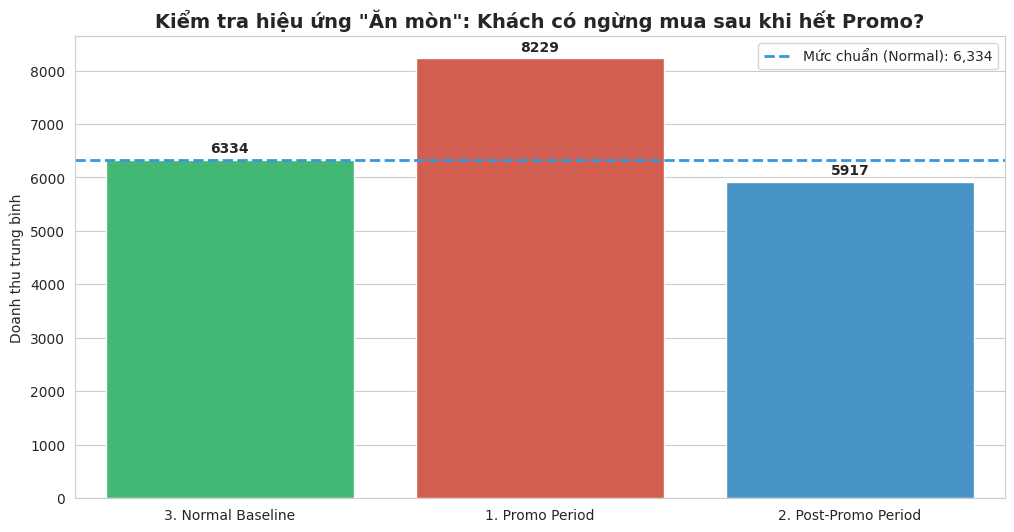

=> CẢNH BÁO: Có hiệu ứng ăn mòn. Sau khi hết Promo, doanh thu giảm sâu -6.6% so với ngày thường.
   Khách hàng đang 'mua trước' (pull-forward) nhu cầu. Cần dãn cách các đợt Promo.


In [ ]:
# 1. Sắp xếp dữ liệu theo Cửa hàng và Thời gian để tính toán liền mạch
df_analysis = df_open.sort_values(['Store', 'Date']).copy()

# 2. Tạo biến "Post-Promo" (Dư chấn sau khuyến mãi)
# Logic: Nếu hôm nay không có Promo (0), nhưng trong vòng 7 ngày trước đó CÓ Promo (1) -> Đây là giai đoạn "nguội" sau khuyến mãi.
# Sử dụng rolling window để kiểm tra lịch sử 7 ngày (khoảng 1 tuần bán hàng)
window_size = 7
# shift(1) để không tính ngày hiện tại, chỉ tính quá khứ
df_analysis['Has_Promo_Last_7Days'] = df_analysis.groupby('Store')['Promo'].transform(
    lambda x: x.shift(1).rolling(window=window_size, min_periods=1).max()
)

# 3. Phân loại ngày bán hàng (Segment)
def classify_day(row):
    if row['Promo'] == 1:
        return '1. Promo Period'       # Đang chạy KM
    elif row['Has_Promo_Last_7Days'] == 1:
        return '2. Post-Promo Period'  # Vừa hết KM (nguy cơ bị ăn mòn)
    else:
        return '3. Normal Baseline'    # Bình thường (xa đợt KM)

df_analysis['Sales_Period'] = df_analysis.apply(classify_day, axis=1)

# 4. Tính toán chỉ số trung bình
cannibalization_stats = df_analysis.groupby('Sales_Period')['Sales'].agg(['mean', 'count']).reset_index()
cannibalization_stats.columns = ['Giai đoạn', 'Doanh thu TB', 'Số ngày quan sát']

# Tính % Chênh lệch so với mức Bình thường (Baseline)
baseline_sales = cannibalization_stats.loc[cannibalization_stats['Giai đoạn']=='3. Normal Baseline', 'Doanh thu TB'].values[0]
cannibalization_stats['So với Bình thường (%)'] = ((cannibalization_stats['Doanh thu TB'] - baseline_sales) / baseline_sales) * 100

print("\n--- KẾT QUẢ PHÂN TÍCH HIỆU ỨNG ĂN MÒN (CANNIBALIZATION) ---")
display(cannibalization_stats.style.background_gradient(cmap='RdYlGn', subset=['So với Bình thường (%)']).format(subset=['So với Bình thường (%)'], formatter="{:.1f}"))

# 5. Trực quan hóa
plt.figure(figsize=(12, 6))
# Vẽ biểu đồ cột
ax = sns.barplot(data=df_analysis, x='Sales_Period', y='Sales', palette=['#2ecc71', '#e74c3c', '#3498db'], errorbar=None)

# Vẽ đường Baseline để dễ so sánh
plt.axhline(y=baseline_sales, color='#3498db', linestyle='--', linewidth=2, label=f'Mức chuẩn (Normal): {baseline_sales:,.0f}')

# Trang trí
plt.title('Kiểm tra hiệu ứng "Ăn mòn": Khách có ngừng mua sau khi hết Promo?', fontsize=14, fontweight='bold')
plt.ylabel('Doanh thu trung bình')
plt.xlabel('')
plt.legend()

# Thêm nhãn giá trị
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontweight='bold')

plt.show()

# --- KẾT LUẬN NHANH ---
post_promo_uplift = cannibalization_stats.loc[cannibalization_stats['Giai đoạn']=='2. Post-Promo Period', 'So với Bình thường (%)'].values[0]
if post_promo_uplift < 0:
    print(f"=> CẢNH BÁO: Có hiệu ứng ăn mòn. Sau khi hết Promo, doanh thu giảm sâu {post_promo_uplift:.1f}% so với ngày thường.")
    print("   Khách hàng đang 'mua trước' (pull-forward) nhu cầu. Cần dãn cách các đợt Promo.")
else:
    print(f"=> TÍN HIỆU TỐT: Không thấy hiệu ứng ăn mòn đáng kể ({post_promo_uplift:+.1f}%).")
    print("   Nhu cầu mua sắm vẫn duy trì ổn định ngay cả khi hết khuyến mãi.")

####

### c) Dùng vũ khí PROMO để cạnh tranh với đối thủ


--- HIỆU QUẢ PROMO THEO KHOẢNG CÁCH ĐỐI THỦ (Competition Distance) ---
                    No_Promo        Promo  Uplift_Pct     Abs_Diff
Competition_Bin                                                   
Rất gần (<500m)  6466.545258  9024.489573   39.556583  2557.944315
Gần (500m-3km)   5871.511336  7998.992710   36.233965  2127.481374
Xa (3km-10km)    5763.324834  7936.765946   37.711584  2173.441112
Rất xa (>10km)   5685.482895  8246.097997   45.037777  2560.615101


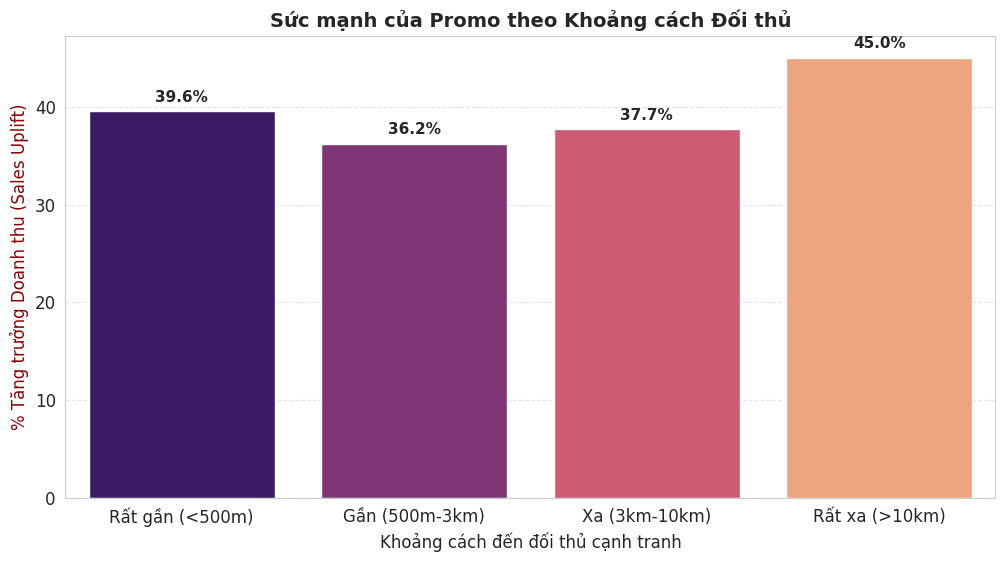

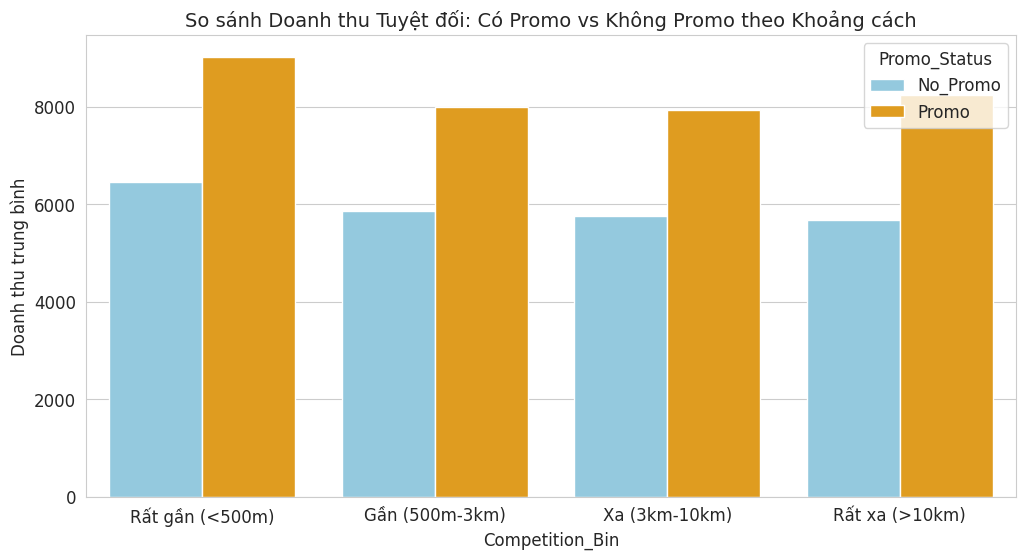

In [ ]:
# --- XỬ LÝ DỮ LIỆU & CHIA NHÓM KHOẢNG CÁCH ---

# 1. Xử lý giá trị thiếu (nếu có) của CompetitionDistance bằng trung vị
# (Median an toàn hơn Mean vì khoảng cách thường có outliers rất lớn)
df_open = df_merge[df_merge['Open'] == 1].copy()
median_dist = df_open['CompetitionDistance'].median()
df_open['CompetitionDistance'].fillna(median_dist, inplace=True)

# 2. Chia nhóm (Binning) Khoảng cách
# Chúng ta chia theo logic kinh doanh thực tế:
# - < 500m: Rất gần (Cạnh tranh gay gắt)
# - 500m - 3000m: Gần (Vùng ảnh hưởng trực tiếp)
# - 3000m - 10000m: Xa (Ít ảnh hưởng)
# - > 10000m: Rất xa (Gần như độc quyền khu vực)

bins = [0, 500, 3000, 10000, float('inf')]
labels = ['Rất gần (<500m)', 'Gần (500m-3km)', 'Xa (3km-10km)', 'Rất xa (>10km)']

df_open['Competition_Bin'] = pd.cut(df_open['CompetitionDistance'], bins=bins, labels=labels)
# ---  TÍNH TOÁN SALES UPLIFT THEO NHÓM ---

# Groupby theo Bin và Promo
comp_stats = df_open.groupby(['Competition_Bin', 'Promo'])['Sales'].mean().unstack()
comp_stats.columns = ['No_Promo', 'Promo']

# Tính % Tăng trưởng (Uplift)
comp_stats['Uplift_Pct'] = ((comp_stats['Promo'] - comp_stats['No_Promo']) / comp_stats['No_Promo']) * 100
comp_stats['Abs_Diff'] = comp_stats['Promo'] - comp_stats['No_Promo']

print("\n--- HIỆU QUẢ PROMO THEO KHOẢNG CÁCH ĐỐI THỦ (Competition Distance) ---")
print(comp_stats)

# ---  TRỰC QUAN HÓA ---

fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ cột cho % Uplift
sns.barplot(x=comp_stats.index, y=comp_stats['Uplift_Pct'], palette='magma', ax=ax1)

# Trang trí biểu đồ
ax1.set_title('Sức mạnh của Promo theo Khoảng cách Đối thủ', fontsize=14, fontweight='bold')
ax1.set_ylabel('% Tăng trưởng Doanh thu (Sales Uplift)', fontsize=12, color='darkred')
ax1.set_xlabel('Khoảng cách đến đối thủ cạnh tranh', fontsize=12)

# Hiển thị giá trị lên cột
for index, value in enumerate(comp_stats['Uplift_Pct']):
    ax1.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
# ---  Xem xét Doanh thu tuyệt đối ---
# Để xem liệu ở gần đối thủ thì doanh thu nền (No Promo) có bị thấp đi không?
plt.figure(figsize=(12, 6))
df_melt = comp_stats[['No_Promo', 'Promo']].reset_index().melt(id_vars='Competition_Bin', var_name='Promo_Status', value_name='Avg_Sales')
sns.barplot(data=df_melt, x='Competition_Bin', y='Avg_Sales', hue='Promo_Status', palette=['skyblue', 'orange'])
plt.title('So sánh Doanh thu Tuyệt đối: Có Promo vs Không Promo theo Khoảng cách', fontsize=14)
plt.ylabel('Doanh thu trung bình')
plt.show()

- **Vùng "Tử chiến" (<500m):** Promo là vũ khí phòng thủ
Tại khu vực này, Lượng khách tăng tới 21.5% khi có Promo.
 Đối thủ ở ngay sát vách. Khách hàng có thể dễ dàng đi bộ sang hàng xóm nếu thấy giá rẻ hơn.
 Promo ở đây không hẳn để "tăng trưởng", mà là để "giành giật & giữ chân". Nếu bạn không chạy Promo, khách hàng sẽ lập tức bị đối thủ hút mất. Đây là cuộc chiến sống còn về thị phần tại chỗ.

- **Vùng "Độc quyền" (>10km):** Promo là nam châm hút khách
Đây là nơi Promo tỏa sáng nhất với lượng khách tăng vọt 27%.
 Cửa hàng nằm ở khu vực thưa thớt, bán kính phục vụ rộng.
Khách hàng phải di chuyển xa để mua sắm. Họ sẽ không đi 10km chỉ để mua một món đồ giá thường. Nhưng khi có Promo, nó tạo ra một "Lý do đủ lớn" để họ thực hiện chuyến đi. Promo biến cửa hàng thành một điểm đến (Destination), kích hoạt hành vi "đi một lần mua cho bõ".

- **Vùng "Lưng chừng" (500m - 10km):**
Tại sao hiệu quả ở đây lại thấp nhất (18.8%)?
 Không đủ gần để hút khách đi bộ tiện đường như nhóm <500m. Cũng không đủ độc quyền để khách hàng chấp nhận đi xa như nhóm >10km.
Khách hàng ở đây có nhiều lựa chọn thay thế nhưng lại không nằm tập trung, khiến tác động của Promo bị loãng đi.

## PROMO2 -" CUỘC CHIẾN SINH TỒN"


### Ai tham gia PROMO2?

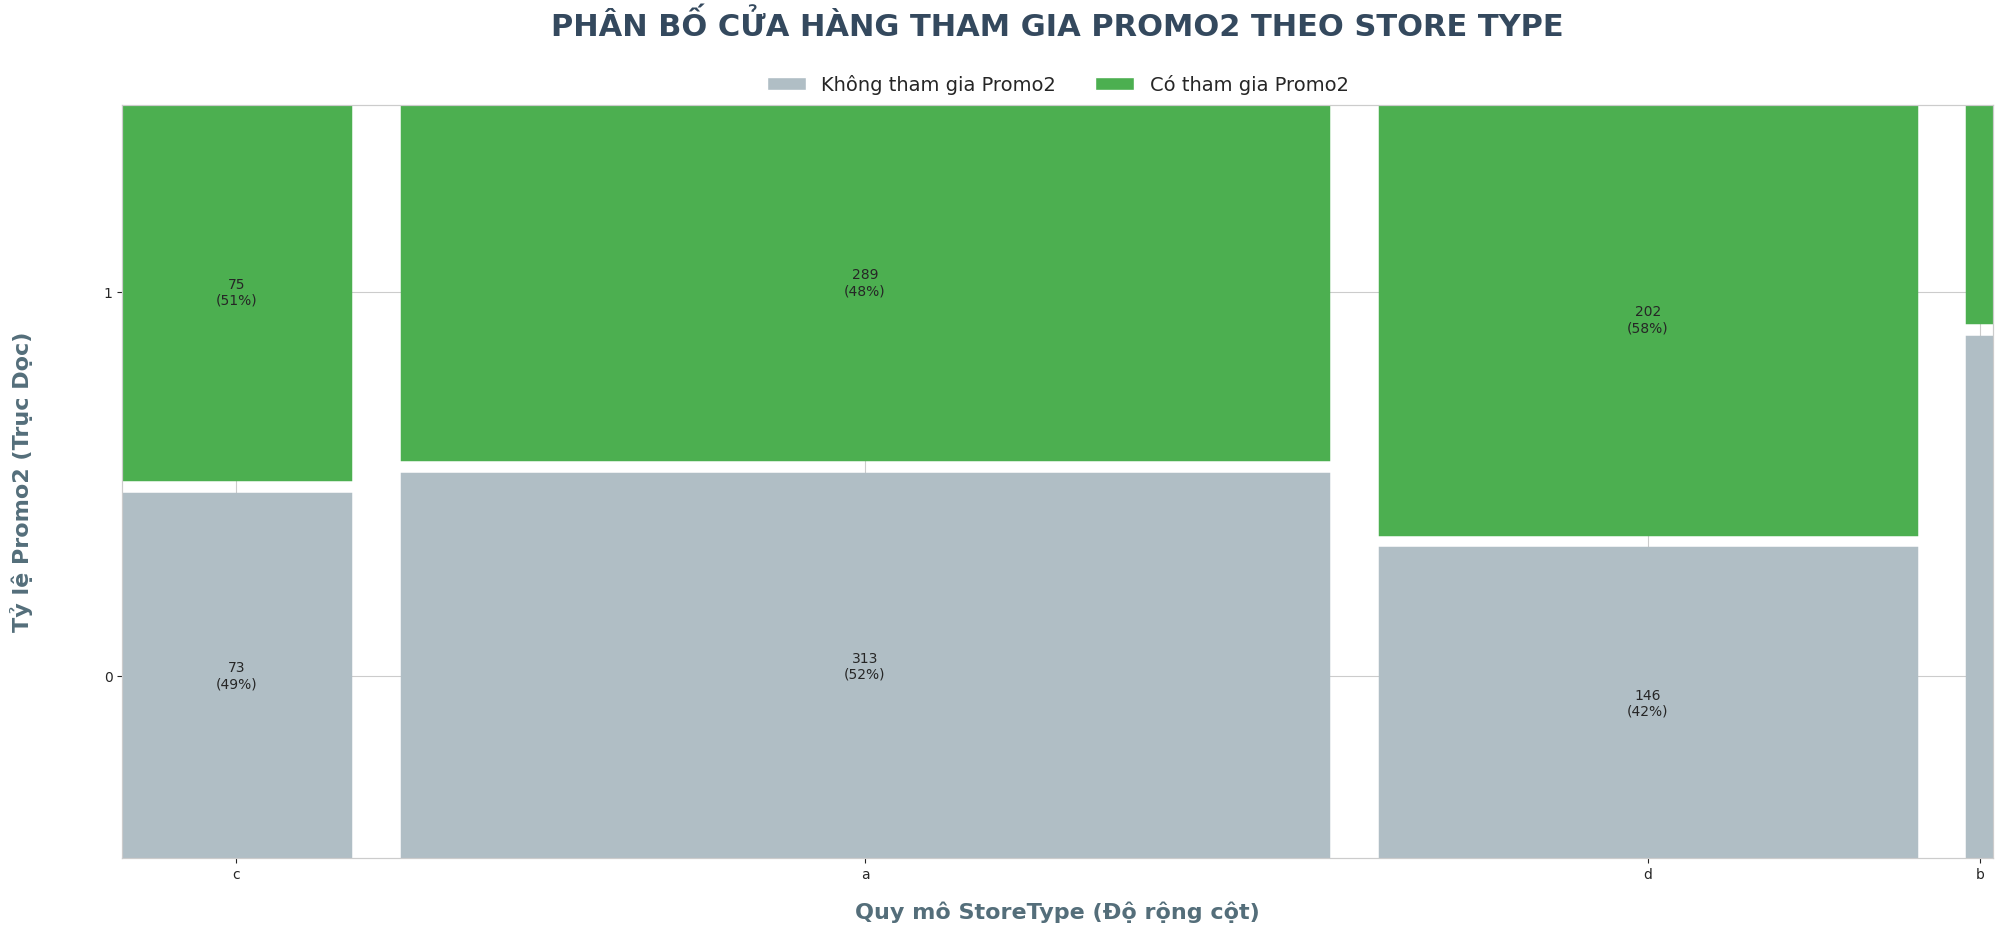


--- BẢNG CHI TIẾT SỐ LIỆU  ---
Promo2       0    1  Total  % Tham Gia
StoreType                             
a          313  289    602        48.0
b           12    5     17        29.4
c           73   75    148        50.7
d          146  202    348        58.0


In [ ]:
import matplotlib.patches as mpatches
from statsmodels.graphics.mosaicplot import mosaic

# df_unique_stores is already created in the notebook context
df_unique_stores = df_open.drop_duplicates(subset=['Store'])[['Store', 'StoreType', 'Promo2']]

# Tính toán số liệu cơ bản
crosstab = pd.crosstab(df_unique_stores['StoreType'], df_unique_stores['Promo2'])
store_type_totals = df_unique_stores['StoreType'].value_counts()
total_stores = len(df_unique_stores)

# --- 2. HÀM TẠO NHÃN THÔNG MINH (SMART LABELIZER) ---
def smart_labelizer(key):
    st_type = key[0]
    p2_status = int(key[1]) # Chuyển đổi sang int để dùng cho crosstab

    count = crosstab.loc[st_type, p2_status]
    pct_in_group = (count / store_type_totals[st_type]) * 100
    global_share = count / total_stores

    # QUY TẮC HIỂN THỊ ĐỂ TRÁNH ĐÈ CHỮ:
    # 1. Nếu ô chiếm dưới 1.5% tổng thể: Ẩn hoàn toàn
    if global_share < 0.015:
        return ""
    # 2. Nếu ô nhỏ (dưới 5%): Chỉ hiện % cho gọn
    elif global_share < 0.05:
        return f"{count}\n({pct_in_group:.0f}%)"
    # 3. Các ô lớn: Hiện đầy đủ
    else:
        return f"{count}\n({pct_in_group:.0f}%)"

# --- 3. THIẾT LẬP VÀ VẼ BIỂU ĐỒ ---
fig, ax = plt.subplots(figsize=(20, 10))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12 # Tăng nhẹ cỡ chữ mặc định

# Định nghĩa màu sắc: Một bảng màu hiện đại, tương phản tốt
colors = {
    '0': '#B0BEC5',  # Xám xanh nhạt cho 'Không tham gia Promo2'
    '1': '#4CAF50'   # Xanh lá cây đậm cho 'Có tham gia Promo2'
}

props = lambda key: {
    'color': colors[key[1]],
    'alpha': 1.0,
    'edgecolor': 'white',
    'linewidth': 2.5 # Tăng độ dày đường viền để rõ hơn
}

# Vẽ Mosaic
mosaic(df_unique_stores, ['StoreType', 'Promo2'],
       title='', # Bỏ title ở đây để custom bên ngoài
       labelizer=smart_labelizer,
       properties=props,
       gap=0.03,
       ax=ax,
       label_rotation=0
      )

# --- 4. TRANG TRÍ (TITLE, LEGEND, AXIS) ---
# Tiêu đề
ax.set_title('PHÂN BỐ CỬA HÀNG THAM GIA PROMO2 THEO STORE TYPE',
             fontsize=22, fontweight='bold', pad=50, color='#34495E') # Màu tối hơn cho tiêu đề

# Xóa khung viền thừa
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Thêm nhãn trục thủ công
ax.text(-0.06, 0.5, 'Tỷ lệ Promo2 (Trục Dọc)', rotation=90, va='center',
        fontsize=16, color='#546E7A', fontweight='bold')
ax.text(0.5, -0.08, 'Quy mô StoreType (Độ rộng cột)', ha='center',
        fontsize=16, color='#546E7A', fontweight='bold')

# Legend (Chú thích)
no_promo_patch = mpatches.Patch(facecolor=colors['0'], edgecolor='white', label='Không tham gia Promo2')
promo_patch = mpatches.Patch(facecolor=colors['1'], edgecolor='white', label='Có tham gia Promo2')
ax.legend(handles=[no_promo_patch, promo_patch],
          loc='upper center', bbox_to_anchor=(0.5, 1.08), # Đặt legend cao hơn chút
          ncol=2, fontsize=14, frameon=False, borderpad=1) # Tăng borderpad

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Điều chỉnh rect để accommodate legend và title
plt.show()

# --- 5. IN BẢNG PHỤ TRỢ (QUAN TRỌNG) ---
# Vì ta đã ẩn số liệu của các ô nhỏ (như StoreType b), ta cần in bảng ra để không mất thông tin
print("\n--- BẢNG CHI TIẾT SỐ LIỆU  ---")
summary_table = pd.crosstab(df_unique_stores['StoreType'], df_unique_stores['Promo2'])
summary_table['Total'] = summary_table.sum(axis=1)
summary_table['% Tham Gia'] = (summary_table[1] / summary_table['Total'] * 100).round(1)
print(summary_table)


### Tuy nhiên họ không có quyền được lựa chọn MUỐN hay KHÔNG MUỐN tham gia PROMO2, mà là họ BUỘC PHẢI tham gia. Bởi vì:

--- KIỂM TRA GIẢ THUYẾT CẠNH TRANH ---
        count         mean          std   min    25%     50%     75%      max
Promo2                                                                       
0       542.0  6549.520295  9374.321188  30.0  992.5  2640.0  8105.0  75860.0
1       570.0  4316.508772  5354.788891  20.0  575.0  2210.0  5590.0  27190.0


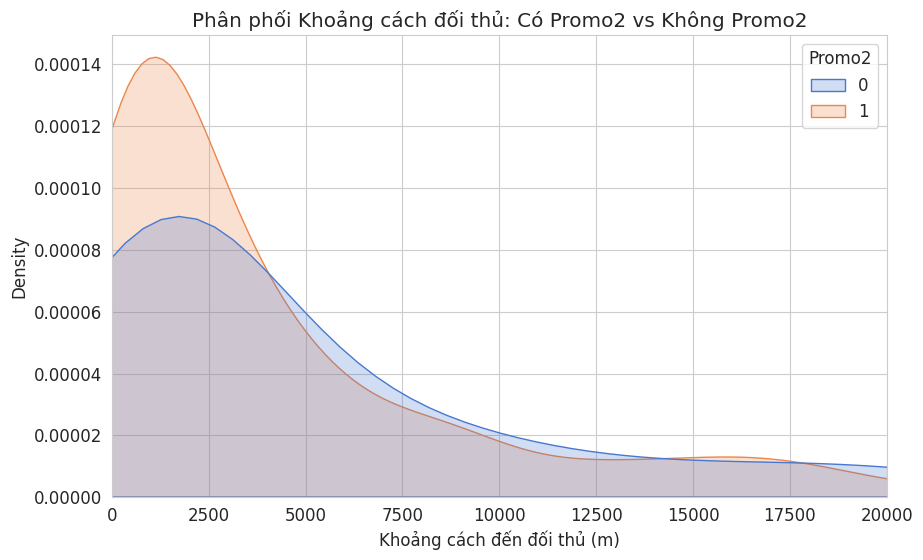


--- MA TRẬN STORE TYPE VÀ ASSORTMENT ---
Assortment    a  b    c
StoreType              
a           381  0  221
b             7  9    1
c            77  0   71
d           128  0  220


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- KIỂM TRA GIẢ THUYẾT CẠNH TRANH ---")

# 1. So sánh khoảng cách đối thủ giữa nhóm Promo2 vs Non-Promo2
comp_dist_stats = store.groupby('Promo2')['CompetitionDistance'].describe()
print(comp_dist_stats)

# 2. Vẽ biểu đồ phân phối để thấy rõ hơn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=store, x='CompetitionDistance', hue='Promo2', common_norm=False, fill=True, palette="muted")
plt.title('Phân phối Khoảng cách đối thủ: Có Promo2 vs Không Promo2')
plt.xlim(0, 20000) # Zoom vào vùng khoảng cách gần để thấy rõ sự khác biệt
plt.xlabel('Khoảng cách đến đối thủ (m)')
plt.show()

# 3. Kiểm tra chéo: Có phải StoreType 'b' (bán Extra) là nhóm hiếm gặp?
# Điều này giải thích tại sao bảng "Mặt hàng Extra" của bạn lại dừng ở năm 2-3 (do thiếu dữ liệu)
print("\n--- MA TRẬN STORE TYPE VÀ ASSORTMENT ---")
print(pd.crosstab(store['StoreType'], store['Assortment']))

Khi phân tích khoảng cách đối thủ (CompetitionDistance), chúng ta phát hiện một sự thật thú vị:

- **Nhóm KHÔNG tham gia Promo2**: Đối thủ ở rất xa (trung bình **6,550m**). Họ đang ở vùng an toàn.

- **Nhóm CÓ tham gia Promo2:** Đối thủ ở ngay sát vách (trung bình **4,316m**).

=> Các cửa hàng tham gia Promo2 đang nằm trong "vùng chiến sự" ác liệt. Họ tìm đến Promo2 không hẳn để tấn công mở rộng, mà trước hết là một chiến lược phòng thủ (Defensive Strategy) để giữ chân khách hàng trước áp lực từ đối thủ.

### "Thung lũng chết"

In [ ]:
# --- 1. FEATURE ENGINEERING (Giữ nguyên logic tính thâm niên) ---
# Lọc dữ liệu chỉ lấy các cửa hàng có tham gia Promo2
df_p2 = df_open[df_open['Promo2'] == 1].copy()

# Tính thâm niên tham gia (Promo2 Tenure)
df_p2['SaleWeek'] = df_p2['Date'].dt.isocalendar().week
df_p2['Promo2_Tenure_Months'] = (
    (df_p2['Date'].dt.year - df_p2['Promo2SinceYear']) * 12 +
    (df_p2['SaleWeek'] - df_p2['Promo2SinceWeek']) / 4.33
)

# Lọc bỏ giá trị âm và chia nhóm thâm niên
df_p2 = df_p2[df_p2['Promo2_Tenure_Months'] > 0]
df_p2['Tenure_Group'] = pd.cut(df_p2['Promo2_Tenure_Months'],
                               bins=[0, 12, 24, 36, 48, 60, 100],
                               labels=['<1 Năm', '1-2 Năm', '2-3 Năm', '3-4 Năm', '4-5 Năm', '>5 Năm'])


 BÁO CÁO HIỆU QUẢ PROMO2 THEO THÂM NIÊN (vs BASELINE) 

[*] MỨC CHUẨN (BASELINE - Organic Sales): 6,328
    (Được tính từ: Ngày ko Promo + Cửa hàng ko tham gia Promo2)

Thâm Niên (Tenure) Doanh Thu TB Số Lượng Mẫu So với Baseline (Abs) So với Baseline (%)
      <1 Năm          6,344        69,036              +16                +0.25%      
     1-2 Năm          6,296        77,105              -32                -0.50%      
     2-3 Năm          6,535        76,571             +207                +3.28%      
     3-4 Năm          6,672        73,283             +343                +5.43%      
     4-5 Năm          6,827        45,396             +498                +7.88%      
      >5 Năm          7,136        21,043             +808               +12.77%      

------------------------------------------------------------
NHẬN XÉT SƠ BỘ:
- Nhóm hiệu quả nhất: >5 Năm (Cao hơn baseline 12.8%)
- Nhóm thấp nhất:     1-2 Năm (So với baseline: -0.5%)



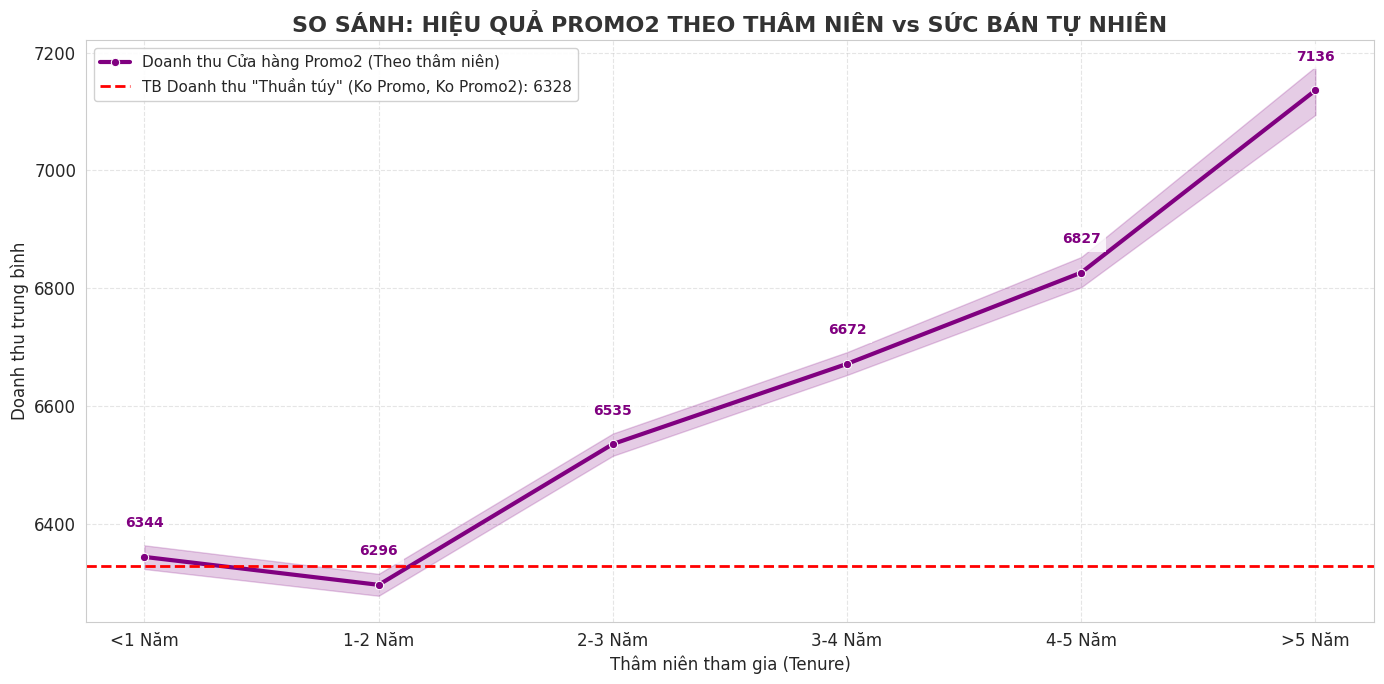

In [ ]:

# --- 2. TÍNH TOÁN BASELINE MỚI (PHẦN QUAN TRỌNG) ---

# Logic: Lấy trung bình doanh thu của những ngày:
# 1. Không có Promo thường (Promo == 0)
# 2. Cửa hàng KHÔNG tham gia Promo2 (Promo2 == 0)
# => Đây là "Sức bán tự nhiên" (Organic Sales) của hệ thống
mask_normal = (df_open['Promo'] == 0) & (df_open['Promo2'] == 0)
normal_sales_mean = df_open[mask_normal]['Sales'].mean()

# --- 4. IN KẾT QUẢ PHÂN TÍCH CHI TIẾT RA TERMINAL ---

print("\n" + "="*60)
print(" BÁO CÁO HIỆU QUẢ PROMO2 THEO THÂM NIÊN (vs BASELINE) ")
print("="*60)

# 1. Tổng hợp dữ liệu theo nhóm
# Tính thêm 'count' để xem độ tin cậy của dữ liệu (số lượng mẫu)
promo2_stats = df_p2.groupby('Tenure_Group', observed=False)['Sales'].agg(['mean', 'count']).reset_index()

# 2. Đổi tên cột cho dễ đọc
promo2_stats.columns = ['Thâm Niên (Tenure)', 'Doanh Thu TB', 'Số Lượng Mẫu']

# 3. Tính toán các chỉ số so sánh với Baseline (Sức bán tự nhiên)
promo2_stats['So với Baseline (Abs)'] = promo2_stats['Doanh Thu TB'] - normal_sales_mean
promo2_stats['So với Baseline (%)'] = (promo2_stats['So với Baseline (Abs)'] / normal_sales_mean) * 100

# 4. Định dạng hiển thị đẹp cho Terminal
# Tạo bản sao để format chuỗi (string) cho dễ đọc, giữ bản gốc để tính toán nếu cần
display_df = promo2_stats.copy()

display_df['Doanh Thu TB'] = display_df['Doanh Thu TB'].map('{:,.0f}'.format)
display_df['So với Baseline (Abs)'] = display_df['So với Baseline (Abs)'].map('{:+,.0f}'.format) # Thêm dấu +/-
display_df['So với Baseline (%)'] = display_df['So với Baseline (%)'].map('{:+.2f}%'.format)   # Thêm dấu +/- và %
display_df['Số Lượng Mẫu'] = display_df['Số Lượng Mẫu'].map('{:,.0f}'.format)

# 5. In thông tin Baseline trước
print(f"\n[*] MỨC CHUẨN (BASELINE - Organic Sales): {normal_sales_mean:,.0f}")
print("    (Được tính từ: Ngày ko Promo + Cửa hàng ko tham gia Promo2)\n")

# 6. In bảng chi tiết
# Sử dụng to_string để in toàn bộ bảng không bị cắt dòng
print(display_df.to_string(index=False, justify='center'))

print("\n" + "-"*60)

# 7. Tự động đưa ra nhận xét sơ bộ (Insight Generator)
print("NHẬN XÉT SƠ BỘ:")
best_group = promo2_stats.loc[promo2_stats['Doanh Thu TB'].idxmax()]
worst_group = promo2_stats.loc[promo2_stats['Doanh Thu TB'].idxmin()]

print(f"- Nhóm hiệu quả nhất: {best_group['Thâm Niên (Tenure)']} "
      f"(Cao hơn baseline {((best_group['Doanh Thu TB']/normal_sales_mean)-1)*100:.1f}%)")

print(f"- Nhóm thấp nhất:     {worst_group['Thâm Niên (Tenure)']} "
      f"(So với baseline: {((worst_group['Doanh Thu TB']/normal_sales_mean)-1)*100:.1f}%)")

# Cảnh báo mẫu nhỏ (nếu có nhóm nào dưới 50 mẫu)
low_sample = promo2_stats[promo2_stats['Số Lượng Mẫu'] < 50]
if not low_sample.empty:
    print(f"\n[!] CẢNH BÁO: Các nhóm sau có lượng dữ liệu ít (<50 mẫu), kết quả có thể không chính xác:")
    print(f"    {', '.join(low_sample['Thâm Niên (Tenure)'].astype(str).tolist())}")

print("="*60 + "\n")

# --- 3. VẼ BIỂU ĐỒ ---

fig, ax = plt.subplots(figsize=(14, 7))

# A. Vẽ đường xu hướng thâm niên của nhóm CÓ Promo2 (Màu tím)
# Lưu ý: Ở đây ta vẫn tính trung bình Sales của nhóm Promo2 (bao gồm cả ngày có Promo và không Promo)
# để xem tổng thể hiệu quả khi tham gia chương trình.
sns.lineplot(x='Tenure_Group', y='Sales', data=df_p2,
             marker='o', color='purple', linewidth=3, label='Doanh thu Cửa hàng Promo2 (Theo thâm niên)')

# B. Vẽ đường kẻ ngang đại diện cho "Sức bán tự nhiên" (Màu đỏ)
plt.axhline(y=normal_sales_mean, color='red', linestyle='--', linewidth=2,
            label=f'TB Doanh thu "Thuần túy" (Ko Promo, Ko Promo2): {normal_sales_mean:.0f}')

# Trang trí
plt.title('SO SÁNH: HIỆU QUẢ PROMO2 THEO THÂM NIÊN vs SỨC BÁN TỰ NHIÊN', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Thâm niên tham gia (Tenure)', fontsize=12)
plt.ylabel('Doanh thu trung bình', fontsize=12)
plt.legend(loc='upper left', fontsize=11, frameon=True, facecolor='white', framealpha=0.9)
plt.grid(True, linestyle='--', alpha=0.5)

# Thêm nhãn giá trị
group_means = df_p2.groupby('Tenure_Group')['Sales'].mean(numeric_only=True)
for i, val in enumerate(group_means):
    if not pd.isna(val):
        ax.text(i, val + 50, f'{val:.0f}', horizontalalignment='center',
                color='purple', fontweight='bold', fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()
plt.show()

Khi mới tham gia chương trình, kỳ vọng về việc doanh thu tăng vọt ngay lập tức đã bị dập tắt. Số liệu chỉ ra một thực tế phũ phàng trong giai đoạn đầu (0-2 năm):

- Năm đầu tiên (**<1 năm**): Chỉ tăng nhẹ **+0.25%** so với mức chuẩn.

- Năm thứ hai (**1-2 năm**): Doanh thu thậm chí sụt giảm, thấp hơn mức chuẩn **-0.5%**.

=> Đây là giai đoạn **"Thung lũng chết".** Cửa hàng phải gồng gánh chi phí khuyến mãi trong khi khách hàng chưa kịp hình thành thói quen mới. Nếu chỉ nhìn vào KPI ngắn hạn (Short-term), Promo2 bị coi là một thất bại.

### Cuộc sàng lọc khắc nghiệt - Không phải ai cũng nên tham gia cuộc chơi này !

Nếu như bức tranh tổng thể cho thấy Promo2 cần "thâm niên" để phát huy tác dụng, thì khi nhìn sâu vào từng loại cửa hàng (StoreType), chúng ta nhận ra một thực tế phũ phàng: **Với một số cửa hàng, sự kiên trì chỉ càng làm vết thương sâu thêm.**

Baseline Sales (Non-Promo2) per StoreType:
  Store Type a: 7,194
  Store Type b: 11,142
  Store Type c: 7,665
  Store Type d: 7,158

      BÁO CÁO CHI TIẾT: HIỆU QUẢ PROMO2 THEO THÂM NIÊN      

🏷️  STORE TYPE: a
   ► Mức chuẩn (Không Promo2): 7,194 (Mục tiêu cần vượt)
   -------------------------------------------------------
   Giai đoạn    |  Doanh Thu |      Chênh lệch | Trạng thái
   -------------------------------------------------------
   <1 Năm       | 6,443      |   -751 (-10.4%) | 🔻 THUA
   1-2 Năm      | 6,226      |   -968 (-13.5%) | 🔻 THUA
   2-3 Năm      | 6,564      |    -630 (-8.8%) | 🔻 THUA
   3-4 Năm      | 6,781      |    -413 (-5.7%) | 🔻 THUA
   4-5 Năm      | 6,932      |    -262 (-3.6%) | 🔻 THUA
   >5 Năm       | 7,203      |      +9 (+0.1%) | ✅ VƯỢT
   -------------------------------------------------------
   => 🌟 KẾT LUẬN: Promo2 bắt đầu có lãi thực sự từ giai đoạn: >5 Năm



🏷️  STORE TYPE: b
   ► Mức chuẩn (Không Promo2): 11,142 (Mục tiêu cần vượt)
   ------

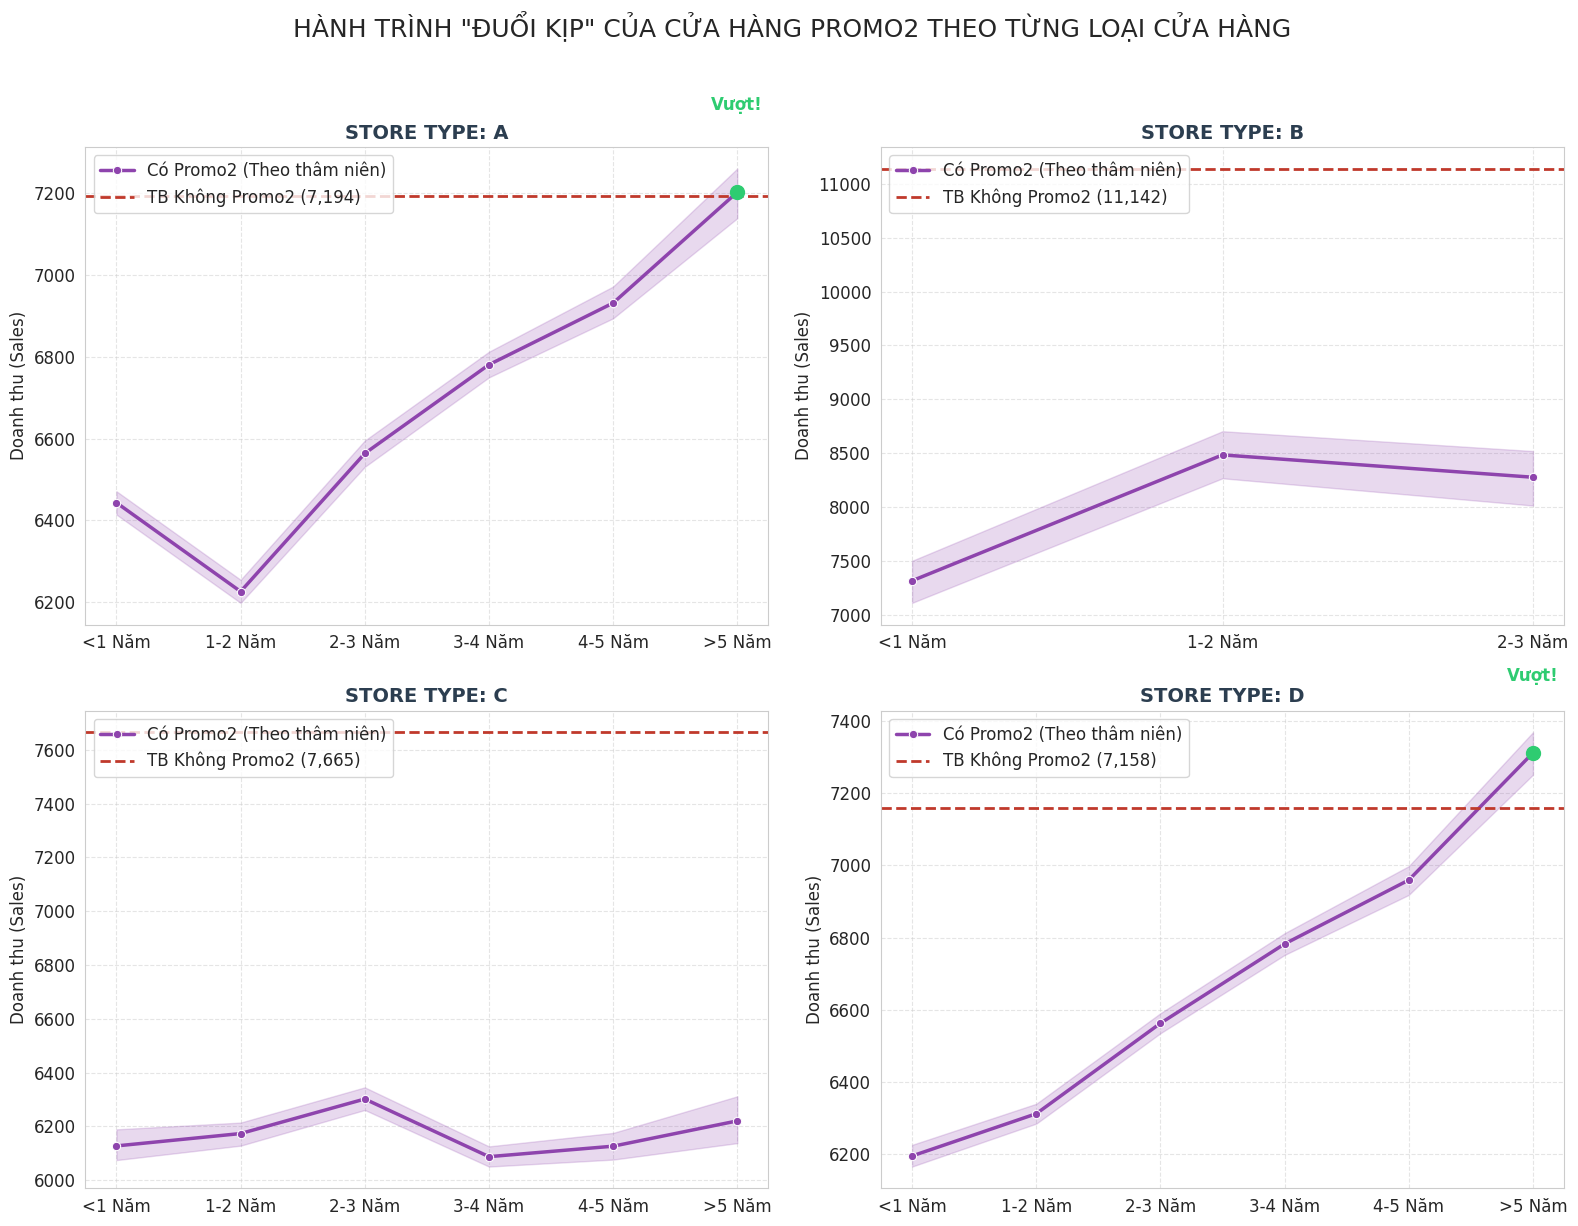

In [ ]:
# --- 4. IN BÁO CÁO CHI TIẾT RA TERMINAL ---
# Calculate baseline for each StoreType (average sales for stores NOT in Promo2)
# This baseline represents the "natural" sales performance without the long-term Promo2 program.
non_promo2_df = df_open[df_open['Promo2'] == 0]
baseline_data = non_promo2_df.groupby('StoreType')['Sales'].mean().to_dict()

# Get unique store types for iteration
store_types = sorted(df_open['StoreType'].unique())

print("Baseline Sales (Non-Promo2) per StoreType:")
for st, sales in baseline_data.items():
    print(f"  Store Type {st}: {sales:,.0f}")
print("\n" + "="*60)
print(f"{'BÁO CÁO CHI TIẾT: HIỆU QUẢ PROMO2 THEO THÂM NIÊN':^60}")
print("="*60)

for s_type in store_types:
    # 1. Lấy dữ liệu
    subset = df_p2[df_p2['StoreType'] == s_type]
    baseline = baseline_data.get(s_type, 0)

    print(f"\n🏷️  STORE TYPE: {s_type}")
    print(f"   ► Mức chuẩn (Không Promo2): {baseline:,.0f} (Mục tiêu cần vượt)")

    if subset.empty:
        print("   (!) Không có dữ liệu Promo2 để so sánh.")
        continue

    # 2. Tính trung bình theo nhóm thâm niên
    group_stats = subset.groupby('Tenure_Group')['Sales'].mean(numeric_only=True)

    # 3. In bảng so sánh
    # Header của bảng con
    print(f"   {'-'*55}")
    print(f"   {'Giai đoạn':<12} | {'Doanh Thu':>10} | {'Chênh lệch':>15} | {'Trạng thái'}")
    print(f"   {'-'*55}")

    first_pass = False # Cờ để đánh dấu lần đầu vượt mặt

    for tenure, sales in group_stats.items():
        if pd.isna(sales): continue # Bỏ qua nếu nhóm đó không có dữ liệu

        diff = sales - baseline
        diff_pct = (diff / baseline) * 100

        # Xác định trạng thái và màu sắc (nếu terminal hỗ trợ, ở đây dùng ký tự)
        if diff > 0:
            status = "✅ VƯỢT"
            diff_str = f"+{diff:,.0f} (+{diff_pct:.1f}%)"

            # Kiểm tra xem đây có phải lần đầu tiên vượt không
            if not first_pass:
                first_pass_msg = tenure
                first_pass = True
        else:
            status = "🔻 THUA"
            diff_str = f"{diff:,.0f} ({diff_pct:.1f}%)"

        print(f"   {tenure:<12} | {sales:,.0f}      | {diff_str:>15} | {status}")

    # 4. Kết luận ngắn gọn cho từng StoreType
    print(f"   {'-'*55}")
    if first_pass:
        print(f"   => 🌟 KẾT LUẬN: Promo2 bắt đầu có lãi thực sự từ giai đoạn: {first_pass_msg}")
    else:
        print(f"   => ⚠️ KẾT LUẬN: Promo2 chưa bao giờ đánh bại được nhóm không khuyến mãi.")
    print("\n")

print("="*60)

# --- 3. VẼ BIỂU ĐỒ FACET (Lưới biểu đồ) ---
store_types = sorted(df_open['StoreType'].unique())
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) # Lưới 2x2
axes = axes.flatten() # Làm phẳng mảng để dễ duyệt vòng lặp

for i, s_type in enumerate(store_types):
    ax = axes[i]

    # Lấy dữ liệu của StoreType hiện tại
    subset = df_p2[df_p2['StoreType'] == s_type]
    baseline = baseline_data.get(s_type, 0) # Lấy mức chuẩn của loại này

    # Nếu không có dữ liệu thì bỏ qua
    if subset.empty:
        ax.text(0.5, 0.5, 'Không có dữ liệu Promo2', ha='center')
        continue

    # A. Vẽ đường xu hướng thâm niên (Màu Tím)
    sns.lineplot(data=subset, x='Tenure_Group', y='Sales',
                 marker='o', color='#8e44ad', linewidth=2.5, ax=ax, label='Có Promo2 (Theo thâm niên)')

    # B. Vẽ đường Baseline (Màu Đỏ)
    ax.axhline(y=baseline, color='#c0392b', linestyle='--', linewidth=2,
               label=f'TB Không Promo2 ({baseline:,.0f})')

    # Trang trí
    ax.set_title(f'STORE TYPE: {s_type.upper()}', fontsize=14, fontweight='bold', color='#2c3e50')
    ax.set_xlabel('')
    ax.set_ylabel('Doanh thu (Sales)')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper left')

    # Đánh dấu điểm "Vượt mặt" (Nếu có)
    # Lấy giá trị trung bình từng mốc thâm niên để so sánh
    means = subset.groupby('Tenure_Group')['Sales'].mean(numeric_only=True)
    for idx, (group, val) in enumerate(means.items()):
        if val > baseline:
            # Nếu doanh thu > baseline -> Tô điểm màu xanh lá để highlight
            ax.plot(idx, val, marker='o', markersize=10, color='#2ecc71')
            ax.text(idx, val + 200, 'Vượt!', ha='center', color='#2ecc71', fontweight='bold')

plt.suptitle('HÀNH TRÌNH "ĐUỔI KỊP" CỦA CỬA HÀNG PROMO2 THEO TỪNG LOẠI CỬA HÀNG', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

**NHỮNG KẺ LẠC LỐI (Store Type b & c) - "Càng cố càng sai"**

Đầu tiên, hãy nhìn vào "vũng lầy" của chiến dịch.

- **Store Type b - "Cú ngã đau đớn":** Đây là nhóm có mức doanh thu chuẩn (Baseline) cao nhất (11000), nhưng Promo2 lại hoạt động như một liều thuốc độc. Ngay năm đầu tiên, họ mất đi hơn 34% doanh thu. Dù cố gắng gồng lỗ đến năm thứ 2, thứ 3, khoảng cách vẫn là quá lớn (-25%). Promo2 hoàn toàn phá vỡ cấu trúc kinh doanh hiệu quả vốn có của nhóm này.

- **Store Type c - "Căn bệnh mãn tính":** Không biến động sốc như b, nhưng c lại "chảy máu" âm thầm và đều đặn. Từ năm này qua năm khác, họ liên tục thua lỗ ở mức ~20%. Không có bất kỳ dấu hiệu hồi phục nào (Trendline đi ngang). Đây là minh chứng rõ nhất cho việc: Promo2 không phù hợp với tệp khách hàng của mô hình c.

#

**CHIẾN LƯỢC "J-CURVE"(Store Type a & d): Chấp nhận lùi 1 bước để tiến 3 bước**

Ánh sáng cuối đường hầm chỉ xuất hiện ở nhóm cửa hàng a và d, nhưng cái giá phải trả là 5 năm chờ đợi.

- **Store Type a - "Người về đích suýt soát":** Họ đã phải chịu lỗ ròng rã suốt 5 năm trời (từ -10% đến -3.6%). Phải đến sau năm thứ 5, họ mới vừa vặn ngoi lên mặt nước với mức tăng trưởng dương mong manh +0.1%. Một chiến thắng quá chật vật và kém thuyết phục.

- **Store Type d - "Ngôi sao hy vọng":** Đây là nhân vật chính của câu chuyện thành công. Khởi đầu cũng đầy khó khăn (-13.5%), nhưng khác với các nhóm còn lại, d cho thấy sức bật mạnh mẽ qua từng năm. Mức lỗ thu hẹp dần và đến sau năm thứ 5, họ thực sự bứt phá với mức tăng +2.2%.


### "Lựa chọn vũ khí" phù hợp

Tại sao có cửa hàng vượt qua được thung lũng này, còn cửa hàng khác thì không? Câu trả lời nằm ở Loại mặt hàng (Assortment) họ kinh doanh. Khi bóc tách dữ liệu, chúng ta thấy hai bức tranh đối lập:

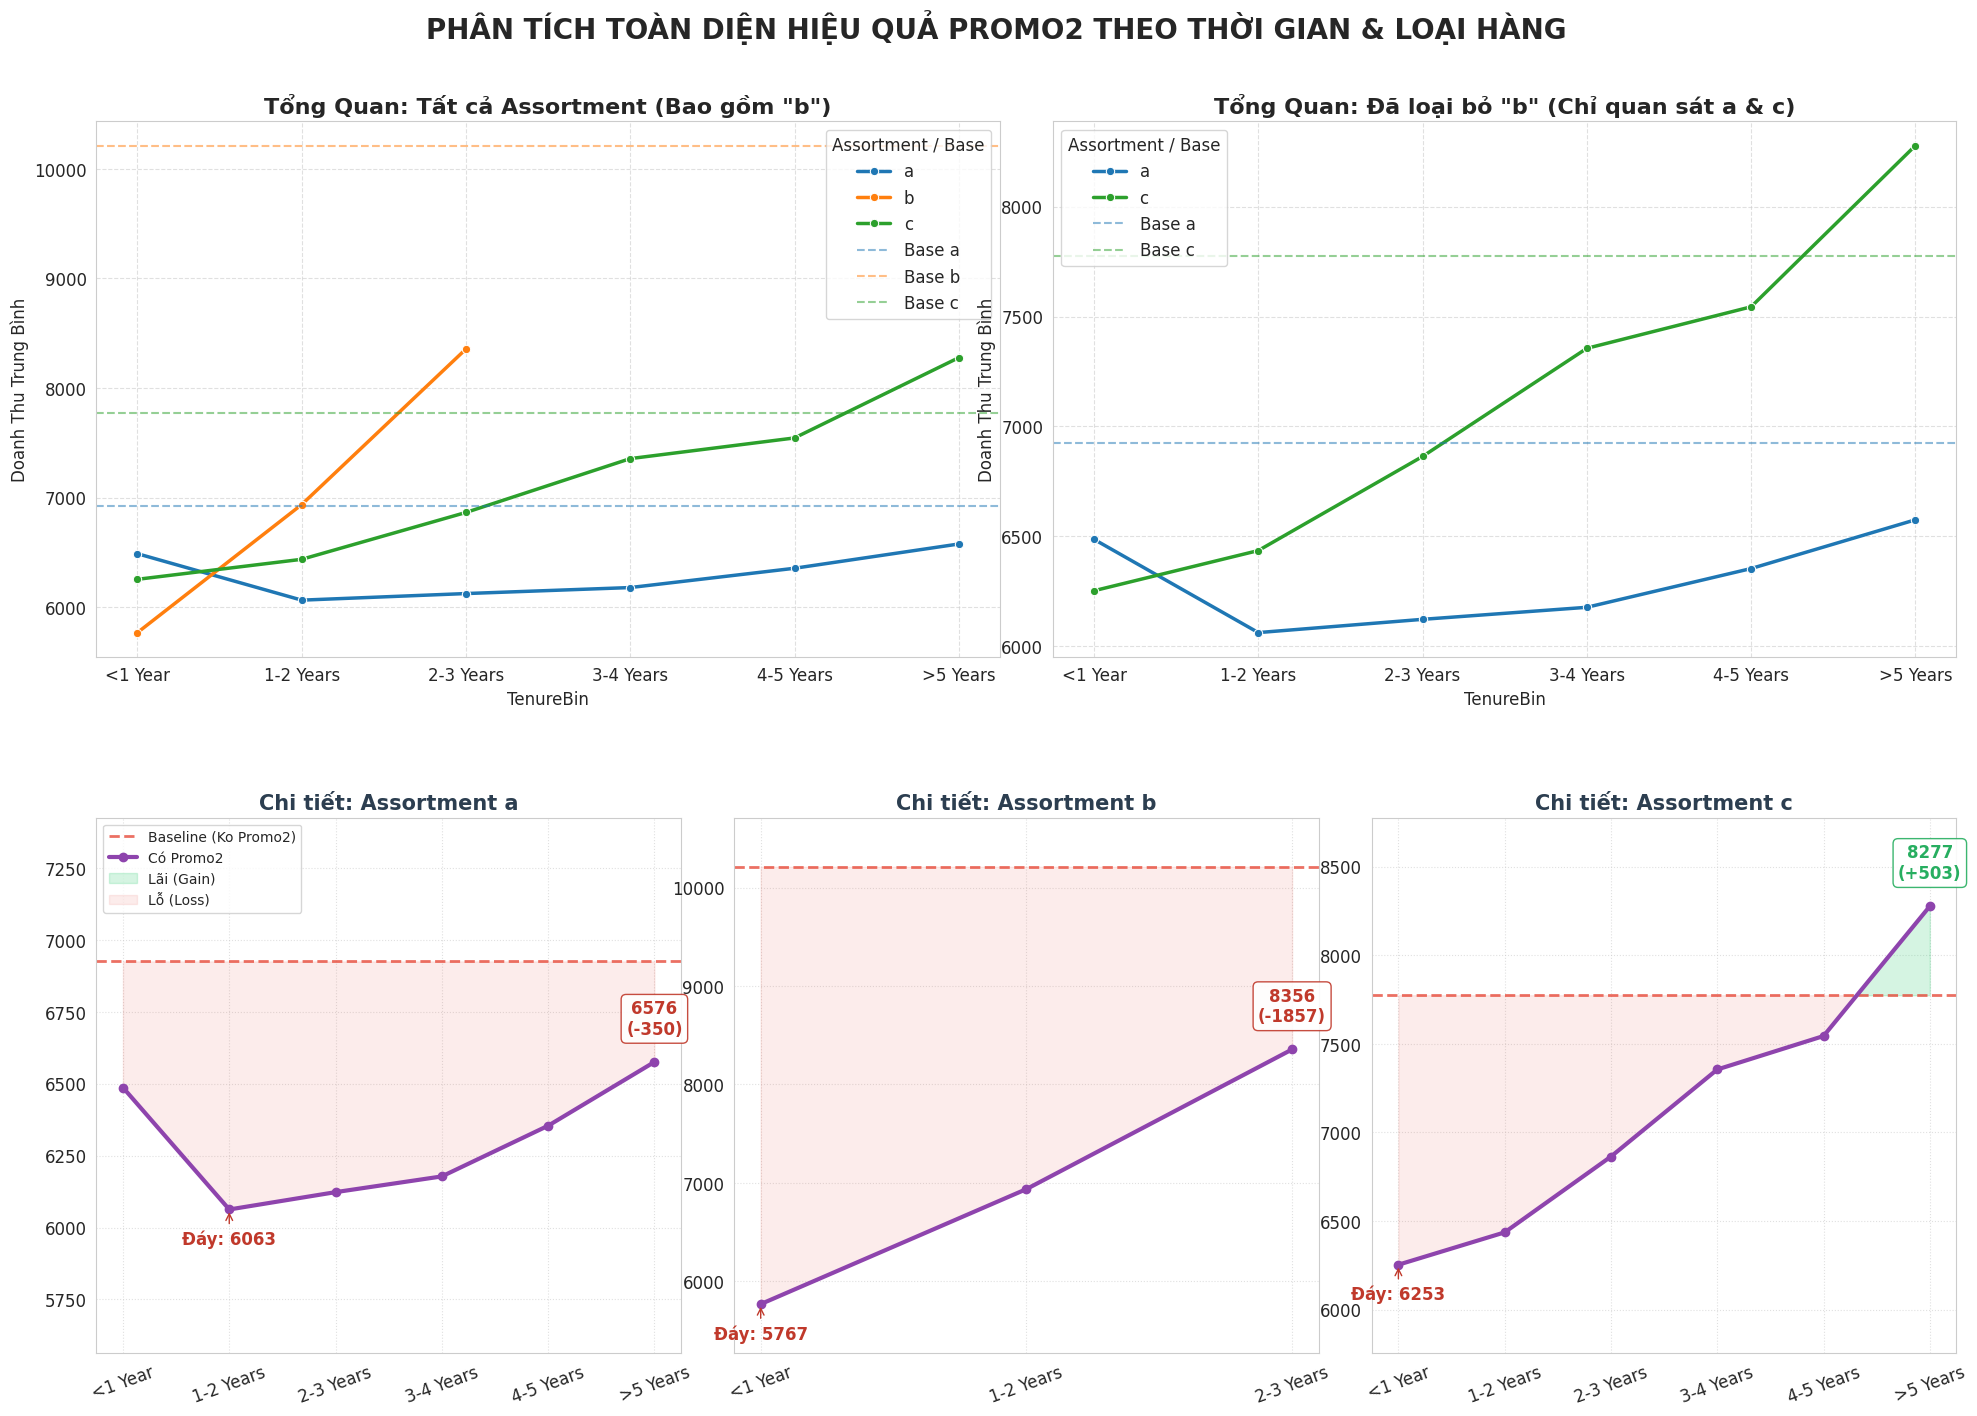

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. CHUẨN BỊ DỮ LIỆU (DATA PREPARATION) ---

# Tạo bản sao cho các cửa hàng có Promo2
promo2_df = df_open[df_open['Promo2'] == 1].copy()

# Chuyển đổi sang datetime an toàn
promo2_df['Promo2Start'] = pd.to_datetime(
    promo2_df['Promo2SinceYear'].astype(int).astype(str) +
    promo2_df['Promo2SinceWeek'].astype(int).astype(str) + '1',
    format='%Y%W%w'
)

# Tính thâm niên (Tenure)
promo2_df['TenureDays'] = (promo2_df['Date'] - promo2_df['Promo2Start']).dt.days
promo2_df['TenureYears'] = promo2_df['TenureDays'] / 365.25

# Lấy dữ liệu active (>0 ngày)
promo2_active = promo2_df[promo2_df['TenureDays'] >= 0].copy()

# Phân nhóm (Binning)
labels = ['<1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '>5 Years']
promo2_active['TenureBin'] = pd.cut(
    promo2_active['TenureYears'],
    bins=[0, 1, 2, 3, 4, 5, 100],
    labels=labels,
    right=False
)

# --- 2. TÍNH TOÁN BASELINE & AGGREGATION ---

# Baseline chung (cho Hàng 1)
non_promo2 = df_open[df_open['Promo2'] == 0].copy()
baseline_sales_general = non_promo2.groupby('Assortment')['Sales'].mean()

# Aggregation cho Hàng 1
# Bộ 1: Tất cả Assortment
agg_all = promo2_active.groupby(['Assortment', 'TenureBin'], observed=False)['Sales'].mean().reset_index()

# Bộ 2: Đã lọc bỏ 'b'
subset_no_b = promo2_active[promo2_active['Assortment'] != 'b'].copy()
agg_no_b = subset_no_b.groupby(['Assortment', 'TenureBin'], observed=False)['Sales'].mean().reset_index()

# Baseline chi tiết cho từng Assortment (cho Hàng 2)
# Lưu ý: Đảm bảo cột Assortment là a, b, c
baseline_assortment_dict = non_promo2.groupby('Assortment')['Sales'].mean()
unique_assortments = sorted(promo2_active['Assortment'].unique())

# --- 3. THIẾT LẬP KHUNG HÌNH (GRID LAYOUT) ---
# Sử dụng GridSpec để chia lưới 2 hàng x 6 cột
# Hàng 1: 2 biểu đồ (mỗi biểu đồ chiếm 3 cột) -> Tỷ lệ 50-50
# Hàng 2: 3 biểu đồ (mỗi biểu đồ chiếm 2 cột) -> Tỷ lệ 33-33-33

fig = plt.figure(figsize=(24, 16)) # Tăng chiều cao lên 16 để chứa đủ 2 hàng
gs = fig.add_gridspec(2, 6, hspace=0.3, wspace=0.2) # hspace tạo khoảng cách giữa 2 hàng

# Định nghĩa màu sắc thống nhất
palette = {'a': 'tab:blue', 'b': 'tab:orange', 'c': 'tab:green'}

# --- 4. VẼ HÀNG 1: TỔNG QUAN (SIDE-BY-SIDE) ---

# === BIỂU ĐỒ 1.1: Trước (Có 'b') ===
ax1 = fig.add_subplot(gs[0, 0:3]) # Chiếm nửa trái hàng trên
sns.lineplot(data=agg_all, x='TenureBin', y='Sales', hue='Assortment',
             marker='o', linewidth=2.5, palette=palette, ax=ax1)

for assortment, baseline in baseline_sales_general.items():
    if assortment in agg_all['Assortment'].unique():
        ax1.axhline(y=baseline, color=palette.get(assortment, 'gray'),
                    linestyle='--', alpha=0.5, label=f'Base {assortment}')

ax1.set_title('Tổng Quan: Tất cả Assortment (Bao gồm "b")', fontsize=16, fontweight='bold')
ax1.set_ylabel('Doanh Thu Trung Bình')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(title='Assortment / Base')

# === BIỂU ĐỒ 1.2: Sau (Bỏ 'b') ===
ax2 = fig.add_subplot(gs[0, 3:6]) # Chiếm nửa phải hàng trên
sns.lineplot(data=agg_no_b, x='TenureBin', y='Sales', hue='Assortment',
             marker='o', linewidth=2.5, palette=palette, ax=ax2)

for assortment, baseline in baseline_sales_general.items():
    if assortment != 'b' and assortment in agg_no_b['Assortment'].unique():
        ax2.axhline(y=baseline, color=palette.get(assortment, 'gray'),
                    linestyle='--', alpha=0.5, label=f'Base {assortment}')

ax2.set_title('Tổng Quan: Đã loại bỏ "b" (Chỉ quan sát a & c)', fontsize=16, fontweight='bold')
ax2.set_ylabel('Doanh Thu Trung Bình')
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(title='Assortment / Base')


# --- 5. VẼ HÀNG 2: CHI TIẾT HIỆU QUẢ (GAIN/LOSS) ---

for i, a_type in enumerate(unique_assortments):
    # Xác định vị trí subplot: Mỗi biểu đồ chiếm 2 cột trong lưới 6 cột
    col_start = i * 2
    col_end = col_start + 2
    ax = fig.add_subplot(gs[1, col_start:col_end])

    # Lấy dữ liệu cho loại hàng này
    subset = promo2_active[promo2_active['Assortment'] == a_type]
    baseline = baseline_assortment_dict.get(a_type, 0)

    if subset.empty:
        ax.text(0.5, 0.5, 'Không có dữ liệu', ha='center')
        continue

    # Tính trung bình theo nhóm thâm niên
    group_means = subset.groupby('TenureBin', observed=False)['Sales'].mean(numeric_only=True)
    x_labels = group_means.index.astype(str)
    y_values = group_means.values

    # A. Vẽ đường Baseline
    ax.axhline(y=baseline, color='#e74c3c', linestyle='--', linewidth=2, alpha=0.8, label='Baseline (Ko Promo2)')

    # B. Vẽ đường Promo2
    ax.plot(x_labels, y_values, marker='o', color='#8e44ad', linewidth=3, label='Có Promo2')

    # C. TÔ MÀU VÙNG CHÊNH LỆCH
    ax.fill_between(x_labels, y_values, baseline,
                    where=(y_values >= baseline), interpolate=True, color='#2ecc71', alpha=0.2, label='Lãi (Gain)')
    ax.fill_between(x_labels, y_values, baseline,
                    where=(y_values < baseline), interpolate=True, color='#e74c3c', alpha=0.1, label='Lỗ (Loss)')

    # D. SMART ANNOTATION
    y_values_finite = y_values[np.isfinite(y_values)] # Lọc NaN

    if len(y_values_finite) > 0:
        # 1. Tìm điểm Đáy (Min)
        min_val_finite = np.nanmin(y_values_finite)
        min_idx_finite = np.where(y_values == min_val_finite)[0][0]

        ax.annotate(f'Đáy: {min_val_finite:.0f}',
                    xy=(min_idx_finite, min_val_finite),
                    xytext=(0, -25), textcoords='offset points',
                    ha='center', color='#c0392b', fontweight='bold',
                    arrowprops=dict(arrowstyle='->', color='#c0392b'))

        # 2. Tìm điểm Cuối
        end_idx_finite = np.where(np.isfinite(y_values))[0][-1]
        last_y_val = y_values[end_idx_finite]
        diff_end = last_y_val - baseline
        status_color = '#27ae60' if diff_end > 0 else '#c0392b'

        ax.annotate(f'{last_y_val:.0f}\n({diff_end:+.0f})',
                    xy=(end_idx_finite, last_y_val),
                    xytext=(0, 20), textcoords='offset points',
                    ha='center', color=status_color, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=status_color, alpha=0.9))

    # Trang trí trục
    ax.set_title(f'Chi tiết: Assortment {a_type}', fontsize=15, fontweight='bold', color='#2c3e50')

    # Thiết lập giới hạn trục Y thông minh
    y_min_lim = np.nanmin(y_values_finite) if len(y_values_finite) > 0 else baseline
    y_max_lim = np.nanmax(y_values_finite) if len(y_values_finite) > 0 else baseline
    ax.set_ylim(bottom=min(y_min_lim, baseline) - 500, top=max(y_max_lim, baseline) + 500)

    ax.grid(True, linestyle=':', alpha=0.6)
    ax.tick_params(axis='x', rotation=20)

    # Chỉ hiện chú thích ở biểu đồ đầu tiên của hàng dưới cho đỡ rối
    if i == 0:
        ax.legend(loc='upper left', fontsize='small')

# Tiêu đề chung toàn bộ hình
plt.suptitle('PHÂN TÍCH TOÀN DIỆN HIỆU QUẢ PROMO2 THEO THỜI GIAN & LOẠI HÀNG',
             fontsize=20, fontweight='bold', y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Chừa chỗ cho suptitle
plt.show()

- **Đường màu xanh lá (Assortment c - Extended)**: Đây là "ngôi sao sáng". Dù khởi đầu thấp hơn mức chuẩn (đường đứt nét xanh lá), nhưng nó có xu hướng đi lên vững chắc. Đặc biệt sau mốc 5 năm, nó vượt lên trên mức chuẩn rất thuyết phục. Đây chính là minh chứng cho chiến lược "đường dài".

- **Đường màu xanh dương (Assortment a - Basic):** Một đường đi ngang và nằm hoàn toàn dưới mức chuẩn (đường đứt nét xanh dương). Điều này xác nhận: Promo2 không thể "cứu" được những cửa hàng chỉ bán đồ cơ bản. Nó là một khoản đầu tư không sinh lời cho nhóm này.

- **Đường màu cam (Assortment b - Extra):** Biến động rất mạnh và dừng lại đột ngột (do thiếu dữ liệu lâu năm). Nó nằm rất xa dưới mức chuẩn. Đây chính là nhóm "Nhiễu" (Outlier) mà chúng ta đã quyết định loại bỏ khỏi chiến lược chính.

### THÀNH QUẢ (THE REWARD) - "Trái Ngọt Cho Kẻ Kiên Trì"

Với những cửa hàng kiên trì theo đuổi chiến lược này trên đường dài, Promo2 chuyển hóa từ "lá chắn" thành "vũ khí" sắc bén.

- Sau mốc 5 năm, doanh thu của nhóm này bùng nổ, cao hơn mức chuẩn tới 12.8%.

- Riêng mặt hàng "c- Extended" đạt mức tăng trưởng dương (+6.5%) so với baseline, bù đắp hoàn toàn cho những năm đầu thua lỗ.

=> Promo2 là một công cụ Loyalty (Trung thành), không phải công cụ Acquisition (Thu hút ngắn hạn). Nó cần thời gian (Time) và đúng đối tượng (Right Assortment) để phát huy tác dụng.

**KHUYẾN NGHỊ CHIẾN LƯỢC (ACTIONABLE INSIGHTS)**

Dựa trên câu chuyện dữ liệu trên, ta cần:

1. **Tái định vị Promo2:** Ngừng coi Promo2 là công cụ kích cầu ngắn hạn. Hãy coi nó là khoản đầu tư dài hạn (Long-term Investment) với thời gian hoàn vốn > 2 năm.

2. **Chiến lược chọn lọc (Segmentation):**

- **STOP**: Ngừng hoặc giảm áp dụng Promo2 cho các cửa hàng chỉ bán Assortment 'a' (Basic). Nó đang bào mòn lợi nhuận vô ích.

- **FOCUS**: Tập trung nguồn lực Promo2 cho các cửa hàng Assortment 'c' (Extended) và StoreType 'd'.

3. **Kiên nhẫn:** Với các cửa hàng mới tham gia nằm trong nhóm tiềm năng, đừng vội cắt bỏ chương trình khi thấy chỉ số âm trong 18 tháng đầu. Hãy duy trì để vượt qua "Thung lũng chết".